In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul

Hangul OK in windows!!


# 01. 데이터 찾기

In [2]:
# WHO에서 제공하는 COVID-19 데이터를 활용
covid_19_raw_data = pd.read_csv("../data/WHO-COVID-19-global-data.csv")

### 컬럼 별 설명
- New_cases : 일일 확진자
- Cumulative_cases : 누적 확진자
- New_deaths : 일일 사망자
- Cumulative_deaths : 누적 사망자

In [3]:
# 데이터는 나라별로, 날짜별로 매일 확잔자와 누적 확진자, 사망자, 누적사망자를 보여준다
covid_19_raw_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
# pivot_table을 이용해 날짜별로 묶어 나라별 확진자수를 더한다.
covid19_pivot = pd.pivot_table(covid_19_raw_data, index = ['Date_reported'],values = 'New_cases', aggfunc = 'sum')
covid19_pivot

,New_cases
Date_reported,
2020-01-03,0
2020-01-04,1
2020-01-05,0
2020-01-06,3
2020-01-07,0
...,...
2021-10-08,459812
2021-10-09,287713
2021-10-10,259980


In [5]:
covid19_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 2020-01-03 to 2021-10-12
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   New_cases  649 non-null    int64
dtypes: int64(1)
memory usage: 10.1+ KB


In [6]:
covid19_pivot=covid19_pivot.reset_index()
covid19_pivot

,Date_reported,New_cases
0,2020-01-03,0
1,2020-01-04,1
2,2020-01-05,0
3,2020-01-06,3
4,2020-01-07,0
...,...,...
644,2021-10-08,459812
645,2021-10-09,287713
646,2021-10-10,259980
647,2021-10-11,237575


In [7]:
covid19_pivot_Cum = pd.pivot_table(covid_19_raw_data, index = ['Date_reported'],values = 'Cumulative_cases', aggfunc = 'sum')
covid19_pivot_Cum = covid19_pivot_Cum.reset_index()
covid19_pivot_Cum

,Date_reported,Cumulative_cases
0,2020-01-03,0
1,2020-01-04,1
2,2020-01-05,1
3,2020-01-06,4
4,2020-01-07,4
...,...,...
644,2021-10-08,236612880
645,2021-10-09,236900593
646,2021-10-10,237160573
647,2021-10-11,237398148


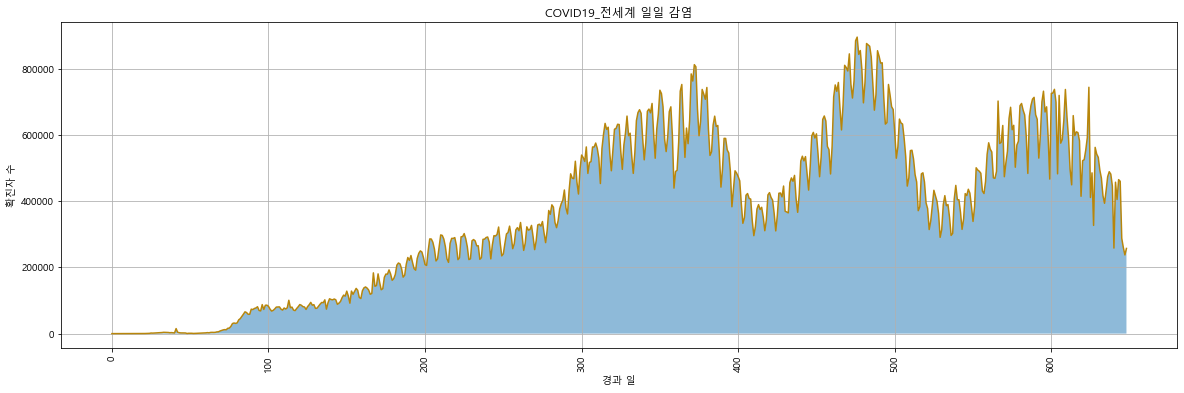

In [8]:
plt.figure(figsize= (20,6))
plt.title("COVID19_전세계 일일 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(covid19_pivot["New_cases"],color = "darkgoldenrod")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(covid19_pivot.index, covid19_pivot["New_cases"].min(), covid19_pivot["New_cases"], alpha=0.5,)
plt.show()

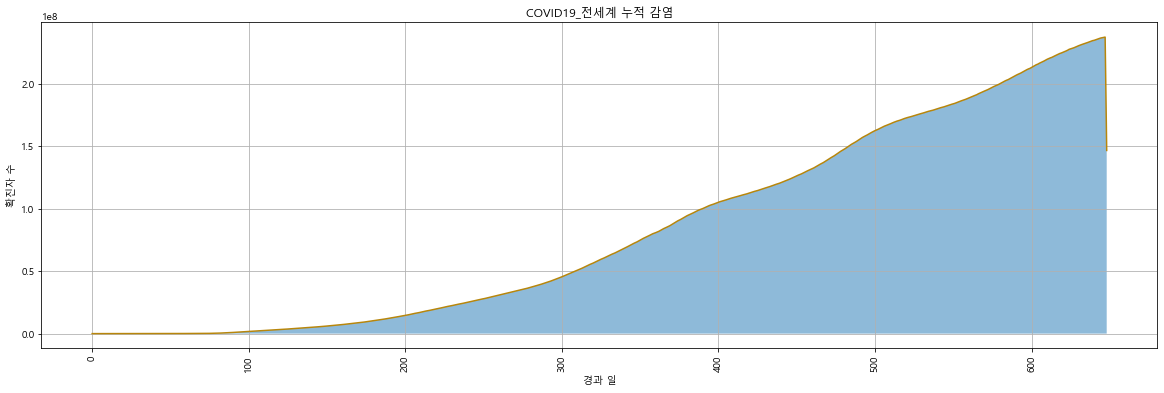

In [9]:
plt.figure(figsize= (20,6))
plt.title("COVID19_전세계 누적 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(covid19_pivot_Cum["Cumulative_cases"],color = "darkgoldenrod")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(covid19_pivot_Cum.index, covid19_pivot_Cum["Cumulative_cases"].min(), covid19_pivot_Cum["Cumulative_cases"], alpha=0.5)
plt.show()

# 02. 비교할 국가 선택

- 2020년 선직국 순위(경제 규모 순위) 상위권 국가에서 선택(by 유엔 무역개발회의)
- 1위 : 미국, 2위 : 중국, 3위: 일본, 4위: 독일, 5위: 인도, 6위 : 영국 7위 : 프랑스 ... 10위 : 한국
- 1~7위 중 중국은 이슈문제로 선택에서 제외하고 순서대로 미국, 일본, 독일, 인도와 한국을 비교하겠다.

In [10]:
covid_19_raw_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


- 미국에 데이터가 하루 부족하기 때문에 통일 시켜주기 위해 648개의 데이터로 통일

In [11]:
KOR_COVID19 = covid_19_raw_data[covid_19_raw_data["Country"] == "Republic of Korea"][:-1]
KOR_COVID19 = KOR_COVID19.reset_index()
del KOR_COVID19["index"]
del KOR_COVID19["WHO_region"]
KOR_COVID19.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
643,2021-10-07,KR,Republic of Korea,2423,325800,8,2544
644,2021-10-08,KR,Republic of Korea,2176,327976,10,2554
645,2021-10-09,KR,Republic of Korea,1949,329925,6,2560
646,2021-10-10,KR,Republic of Korea,1594,331519,15,2575
647,2021-10-11,KR,Republic of Korea,1297,332816,8,2583


In [12]:
USA_COVID19 = covid_19_raw_data[covid_19_raw_data["Country"] == "United States of America"]
USA_COVID19 = USA_COVID19.reset_index()
del USA_COVID19["index"]
del USA_COVID19["WHO_region"]
USA_COVID19.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
643,2021-10-07,US,United States of America,110262,43679274,2803,701708
644,2021-10-08,US,United States of America,112980,43792254,1891,703599
645,2021-10-09,US,United States of America,0,43792254,0,703599
646,2021-10-10,US,United States of America,0,43792254,0,703599
647,2021-10-11,US,United States of America,0,43792254,0,703599


In [13]:
JP_COVID19 = covid_19_raw_data[covid_19_raw_data["Country"] == "Japan"][:-1]
JP_COVID19 = JP_COVID19.reset_index()
del JP_COVID19["index"]
del JP_COVID19["WHO_region"]
JP_COVID19.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
643,2021-10-07,JP,Japan,1077,1707752,30,17819
644,2021-10-08,JP,Japan,990,1708742,37,17856
645,2021-10-09,JP,Japan,867,1709609,46,17902
646,2021-10-10,JP,Japan,785,1710394,25,17927
647,2021-10-11,JP,Japan,579,1710973,14,17941


In [14]:
GER_COVID19 = covid_19_raw_data[covid_19_raw_data["Country"] == "Germany"][:-1]
GER_COVID19 = GER_COVID19.reset_index()
del GER_COVID19["index"]
del GER_COVID19["WHO_region"]
GER_COVID19.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
643,2021-10-07,DE,Germany,11644,4283378,68,94027
644,2021-10-08,DE,Germany,10429,4293807,86,94113
645,2021-10-09,DE,Germany,8854,4302661,65,94178
646,2021-10-10,DE,Germany,7612,4310273,24,94202
647,2021-10-11,DE,Germany,3111,4313384,7,94209


In [15]:
IND_COVID19 = covid_19_raw_data[covid_19_raw_data["Country"] == "India"][:-1]
IND_COVID19 = IND_COVID19.reset_index()
del IND_COVID19["index"]
del IND_COVID19["WHO_region"]
IND_COVID19.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
643,2021-10-07,IN,India,22431,33894312,318,449856
644,2021-10-08,IN,India,21257,33915569,271,450127
645,2021-10-09,IN,India,19740,33935309,248,450375
646,2021-10-10,IN,India,18166,33953475,214,450589
647,2021-10-11,IN,India,18132,33971607,193,450782


In [16]:
# concat을 통해 데이터들을 하나의 데이터 프레임으로 묶는다
merge_Covid_Data = pd.concat([KOR_COVID19,USA_COVID19,JP_COVID19,GER_COVID19,IND_COVID19])
merge_Covid_Data =merge_Covid_Data.reset_index()
merge_Covid_Data.tail()

,index,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
3235,643,2021-10-07,IN,India,22431,33894312,318,449856
3236,644,2021-10-08,IN,India,21257,33915569,271,450127
3237,645,2021-10-09,IN,India,19740,33935309,248,450375
3238,646,2021-10-10,IN,India,18166,33953475,214,450589
3239,647,2021-10-11,IN,India,18132,33971607,193,450782


In [17]:
pop = pd.pivot_table(merge_Covid_Data, index = ['Date_reported'],columns= ["Country"], values = ['New_cases',"Cumulative_cases","New_deaths","Cumulative_deaths"], aggfunc = 'sum')
pop.head()

Cumulative_cases                                \
Country                Germany India Japan Republic of Korea   
Date_reported                                                  
2020-01-03                   0     0     0                 0   
2020-01-04                   0     0     0                 0   
2020-01-05                   0     0     0                 0   
2020-01-06                   0     0     0                 0   
2020-01-07                   0     0     0                 0   

                                       Cumulative_deaths              \
Country       United States of America           Germany India Japan   
Date_reported                                                          
2020-01-03                           0                 0     0     0   
2020-01-04                           0                 0     0     0   
2020-01-05                           0                 0     0     0   
2020-01-06                           0                 0     0     0   
2020-01-07                           0                 0     0     0   

                                                         New_cases        \
Country       Republic of Korea United States of America   Germany India   
Date_reported                                                              
2020-01-03                    0                        0         0     0   
2020-01-04                    0                        0         0     0   
2020-01-05                    0                        0         0     0   
2020-01-06                    0                        0         0     0   
2020-01-07                    0                        0         0     0   

                                                               New_deaths  \
Country       Japan Republic of Korea United States of America    Germany   
Date_reported                                                               
2020-01-03        0                 0                        0          0   
2020-01-04        0                 0                        0          0   
2020-01-05        0                 0                        0          0   
2020-01-06        0                 0                        0          0   
2020-01-07        0                 0                        0          0   

                                                                      
Country       India Japan Republic of Korea United States of America  
Date_reported                                                         
2020-01-03        0     0                 0                        0  
2020-01-04        0     0                 0                        0  
2020-01-05        0     0                 0                        0  
2020-01-06        0     0                 0                        0  
2020-01-07        0     0                 0                        0

In [18]:
tmp_columns = [
    pop.columns.get_level_values(0)[n] + " " +pop.columns.get_level_values(1)[n]
    for n in range(0, len(pop.columns.get_level_values(0)))
]

pop.columns = tmp_columns
pop.head()

,Cumulative_cases Germany,Cumulative_cases India,Cumulative_cases Japan,Cumulative_cases Republic of Korea,Cumulative_cases United States of America,Cumulative_deaths Germany,Cumulative_deaths India,Cumulative_deaths Japan,Cumulative_deaths Republic of Korea,Cumulative_deaths United States of America,New_cases Germany,New_cases India,New_cases Japan,New_cases Republic of Korea,New_cases United States of America,New_deaths Germany,New_deaths India,New_deaths Japan,New_deaths Republic of Korea,New_deaths United States of America
Date_reported,,,,,,,,,,,,,,,,,,,,
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 03. 확진자 수, 사망자수 시각화 

### 한국 일일 감염자 수와 누적 감염자 수 / 일일 사망자 수와 누적 사망자 수

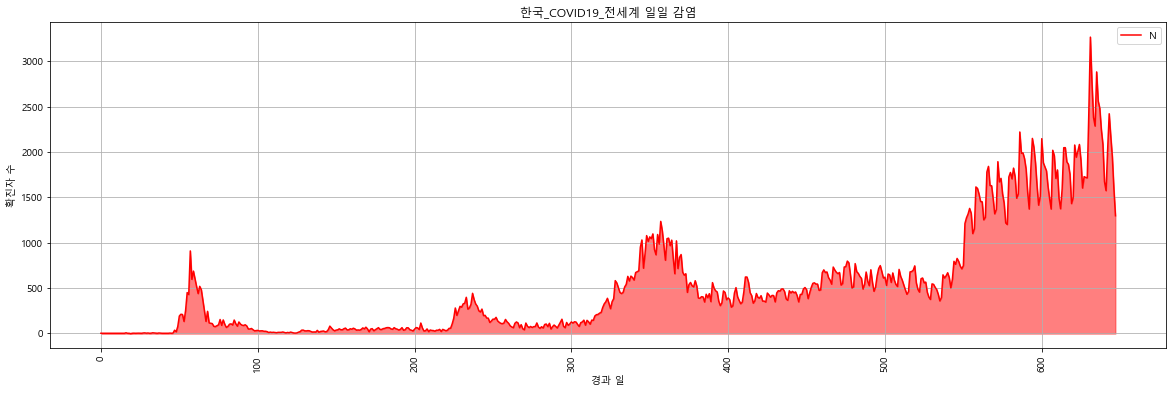

In [19]:
plt.figure(figsize= (20,6))
plt.title("한국_COVID19_전세계 일일 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(KOR_COVID19["New_cases"],color = "red")
plt.legend(labels="New_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(KOR_COVID19.index, KOR_COVID19["New_cases"].min(), KOR_COVID19["New_cases"], alpha=0.5, color="red")
plt.show()


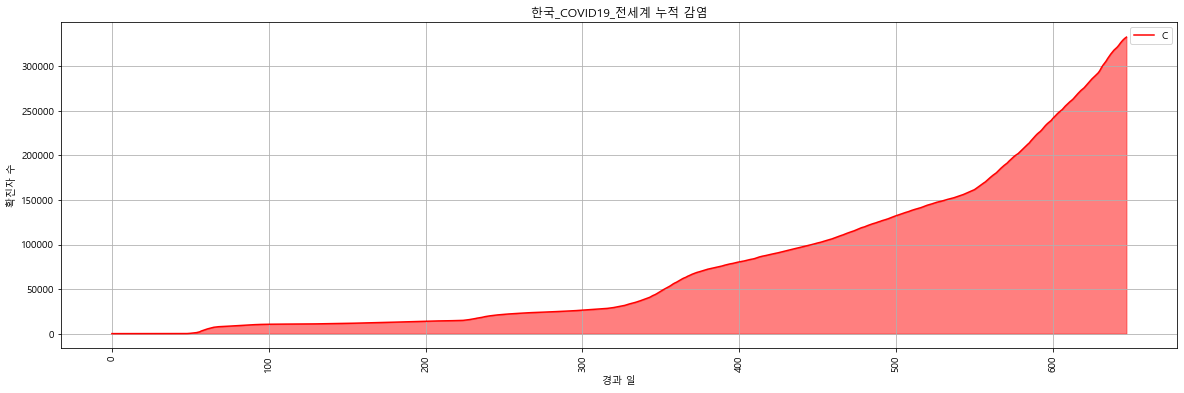

In [21]:
plt.figure(figsize= (20,6))
plt.title("한국_COVID19_전세계 누적 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(KOR_COVID19["Cumulative_cases"],color = "red")
plt.legend(labels="Cumulative_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(KOR_COVID19.index, KOR_COVID19["Cumulative_cases"].min(), KOR_COVID19["Cumulative_cases"], alpha=0.5,color = "red")
plt.show()

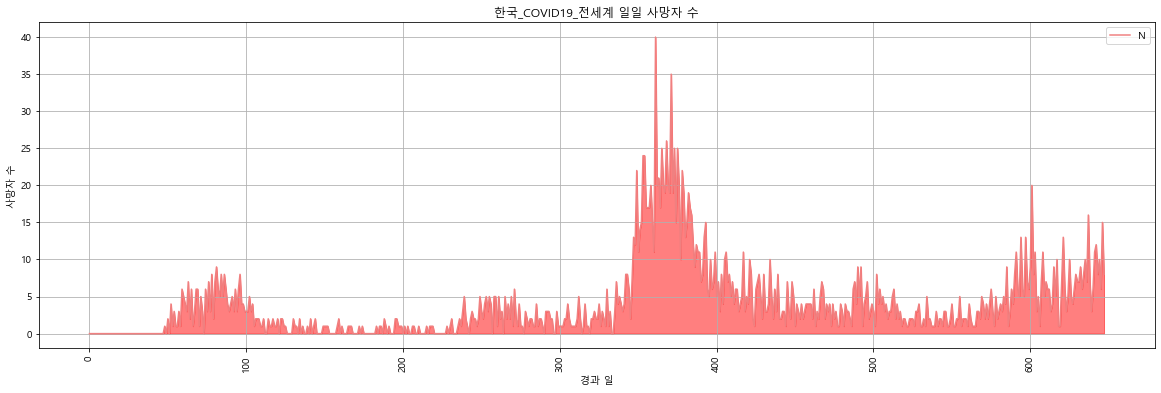

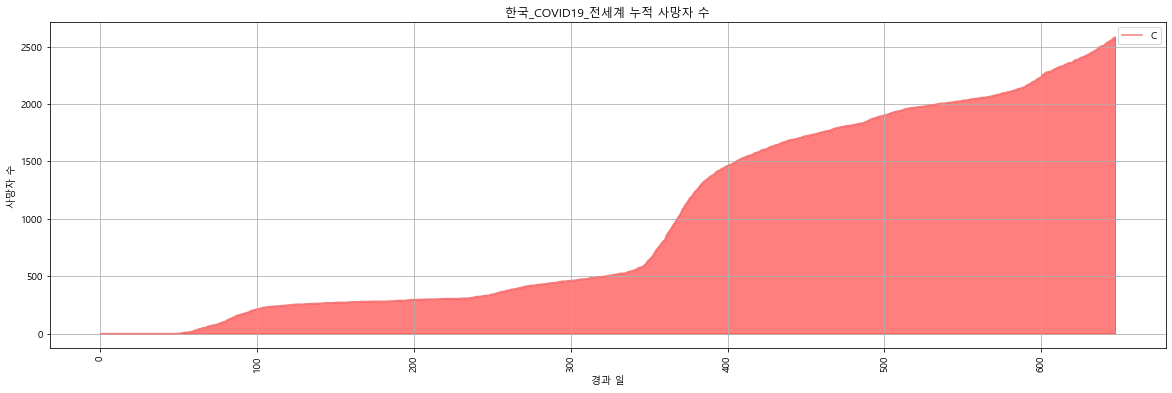

In [22]:
plt.figure(figsize= (20,6))
plt.title("한국_COVID19_전세계 일일 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(KOR_COVID19["New_deaths"],color = "LightCoral")
plt.legend(labels="New_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(KOR_COVID19.index, KOR_COVID19["New_deaths"].min(), KOR_COVID19["New_deaths"], alpha=0.5, color="red")
plt.show()


plt.figure(figsize= (20,6))
plt.title("한국_COVID19_전세계 누적 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(KOR_COVID19["Cumulative_deaths"],color = "LightCoral")
plt.legend(labels="Cumulative_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(KOR_COVID19.index, KOR_COVID19["Cumulative_deaths"].min(), KOR_COVID19["Cumulative_deaths"], alpha=0.5, color="red")
plt.show()


### 미국 일일 감염자 수와 누적 감염자 수 / 일일 사망자 수와 누적 사망자 수

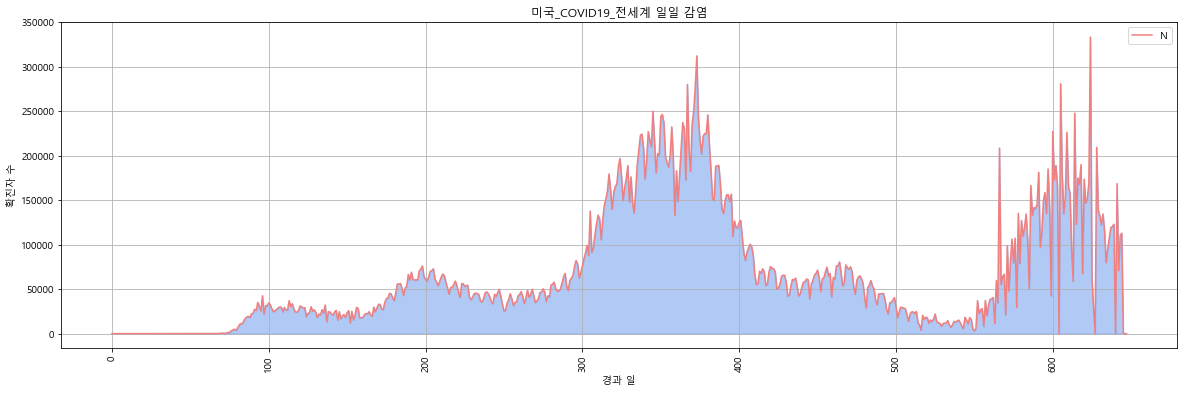

In [25]:
plt.figure(figsize= (20,6))
plt.title("미국_COVID19_전세계 일일 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(USA_COVID19["New_cases"],color = "LightCoral")
plt.legend(labels="New_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(USA_COVID19.index, USA_COVID19["New_cases"].min(), USA_COVID19["New_cases"], alpha=0.5, color="cornflowerblue")
plt.show()


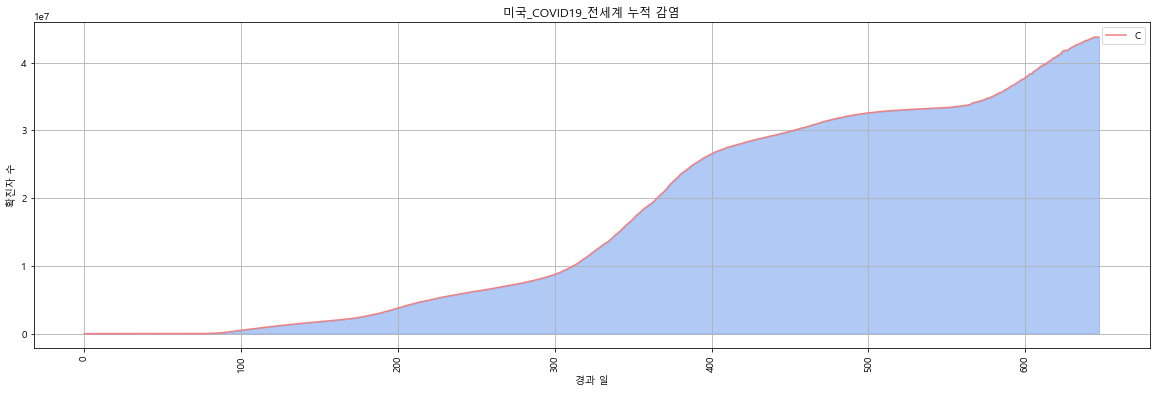

In [27]:
plt.figure(figsize= (20,6))
plt.title("미국_COVID19_전세계 누적 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(USA_COVID19["Cumulative_cases"],color = "LightCoral")
plt.legend(labels="Cumulative_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(USA_COVID19.index, USA_COVID19["Cumulative_cases"].min(), USA_COVID19["Cumulative_cases"], alpha=0.5,color="cornflowerblue")
plt.show()

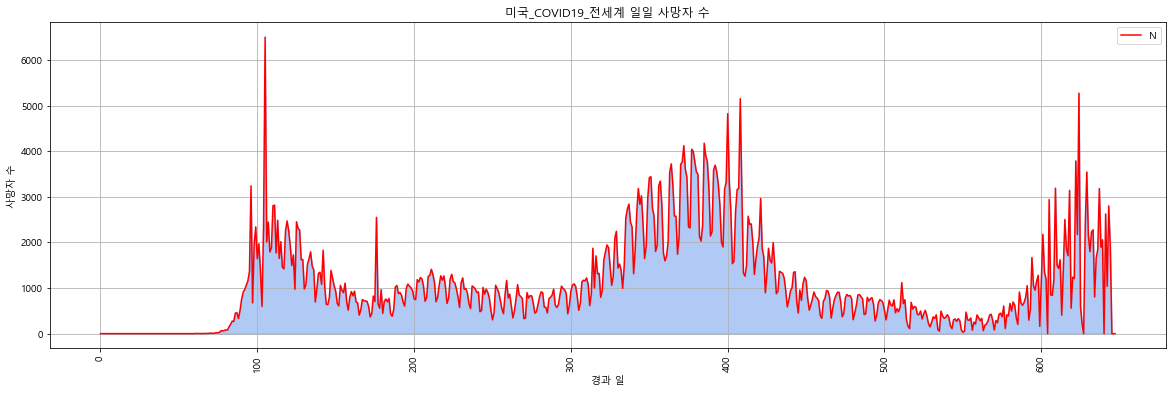

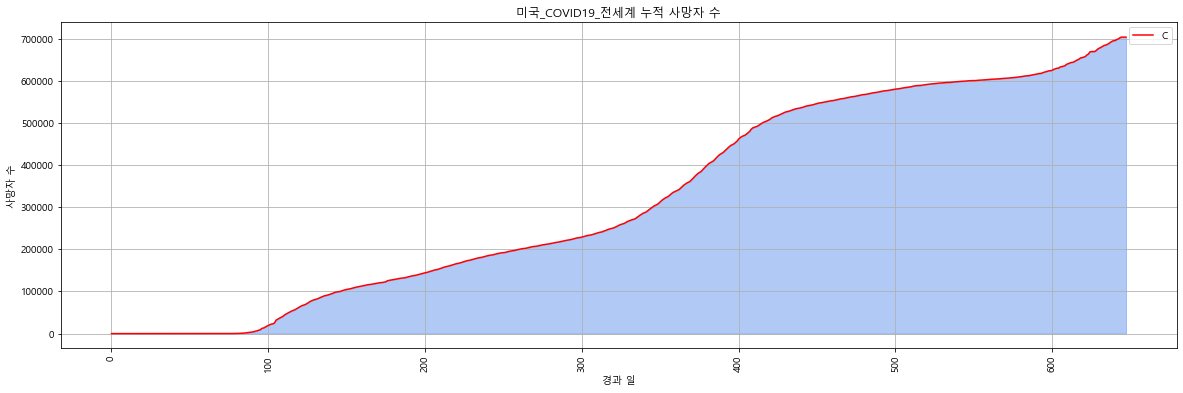

In [28]:
plt.figure(figsize= (20,6))
plt.title("미국_COVID19_전세계 일일 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(USA_COVID19["New_deaths"],color = "red")
plt.legend(labels="New_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(USA_COVID19.index, USA_COVID19["New_deaths"].min(), USA_COVID19["New_deaths"], alpha=0.5, color="cornflowerblue")
plt.show()


plt.figure(figsize= (20,6))
plt.title("미국_COVID19_전세계 누적 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(USA_COVID19["Cumulative_deaths"],color = "red")
plt.legend(labels="Cumulative_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(USA_COVID19.index, USA_COVID19["Cumulative_deaths"].min(), USA_COVID19["Cumulative_deaths"], alpha=0.5, color="cornflowerblue")
plt.show()


### 일본 일일 감염자 수와 누적 감염자 수 / 일일 사망자 수와 누적 사망자 수

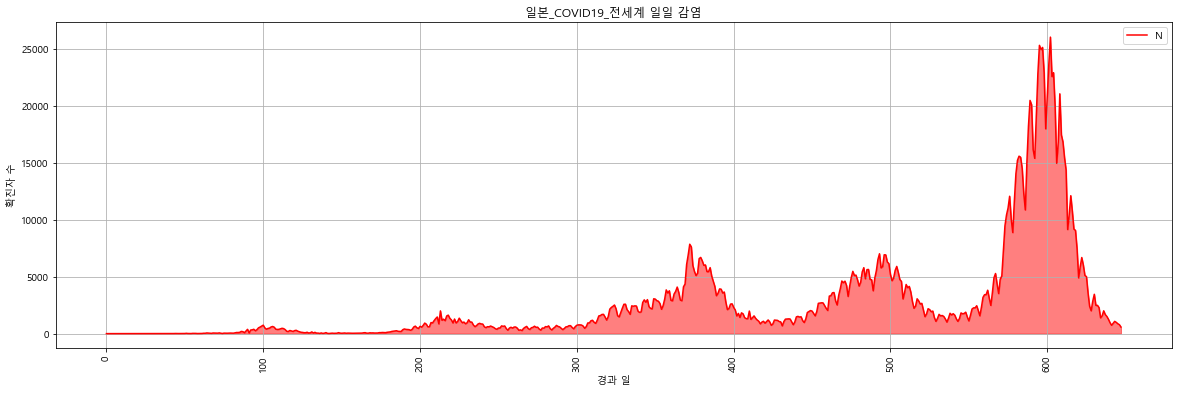

In [25]:
plt.figure(figsize= (20,6))
plt.title("일본_COVID19_전세계 일일 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(JP_COVID19["New_cases"],color = "red")
plt.legend(labels="New_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(JP_COVID19.index, JP_COVID19["New_cases"].min(), JP_COVID19["New_cases"], alpha=0.5, color="red")
plt.show()


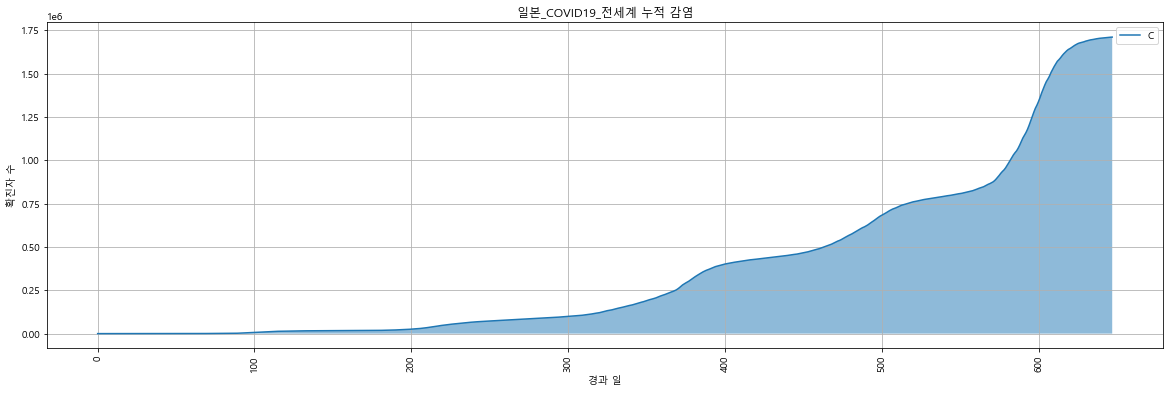

In [26]:
plt.figure(figsize= (20,6))
plt.title("일본_COVID19_전세계 누적 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(JP_COVID19["Cumulative_cases"])
plt.legend(labels="Cumulative_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(JP_COVID19.index, JP_COVID19["Cumulative_cases"].min(), JP_COVID19["Cumulative_cases"], alpha=0.5)
plt.show()

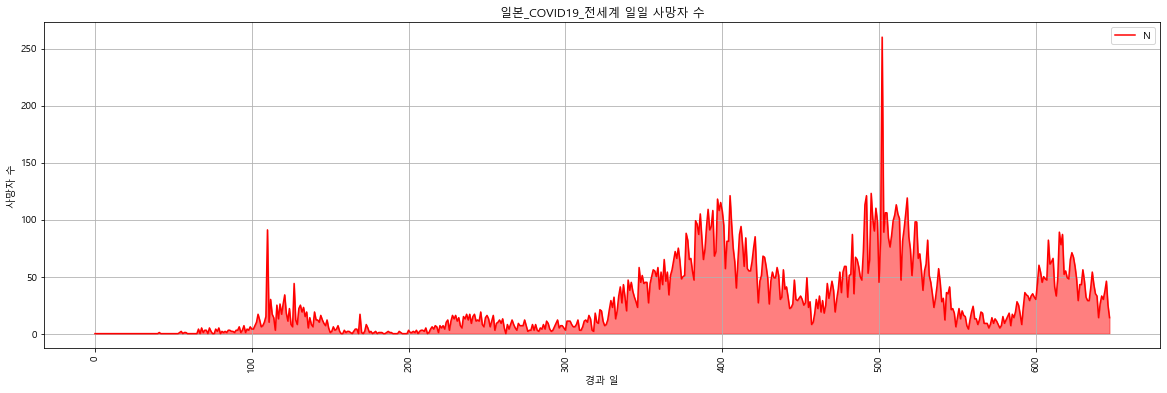

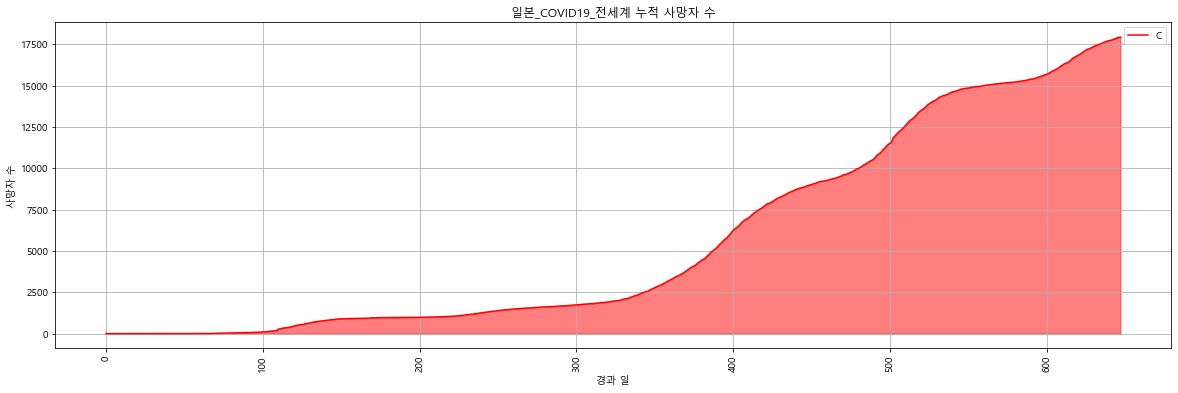

In [27]:
plt.figure(figsize= (20,6))
plt.title("일본_COVID19_전세계 일일 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(JP_COVID19["New_deaths"],color = "red")
plt.legend(labels="New_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(JP_COVID19.index, JP_COVID19["New_deaths"].min(), JP_COVID19["New_deaths"], alpha=0.5, color="red")
plt.show()


plt.figure(figsize= (20,6))
plt.title("일본_COVID19_전세계 누적 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(JP_COVID19["Cumulative_deaths"],color = "red")
plt.legend(labels="Cumulative_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(JP_COVID19.index, JP_COVID19["Cumulative_deaths"].min(), JP_COVID19["Cumulative_deaths"], alpha=0.5, color="red")
plt.show()


### 독일 일일 감염자 수와 누적 감염자 수 / 일일 사망자 수와 누적 사망자 수

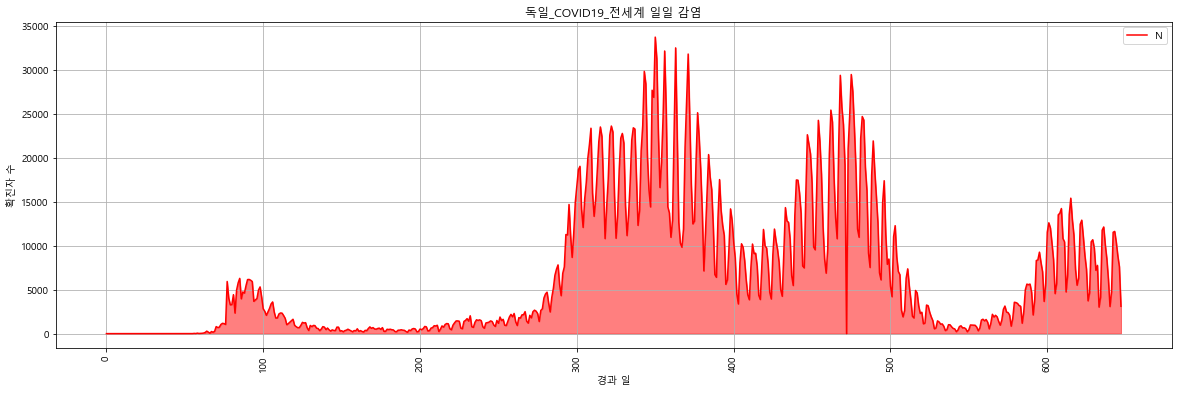

In [28]:
plt.figure(figsize= (20,6))
plt.title("독일_COVID19_전세계 일일 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(GER_COVID19["New_cases"],color = "red")
plt.legend(labels="New_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(GER_COVID19.index, GER_COVID19["New_cases"].min(), GER_COVID19["New_cases"], alpha=0.5, color="red")
plt.show()


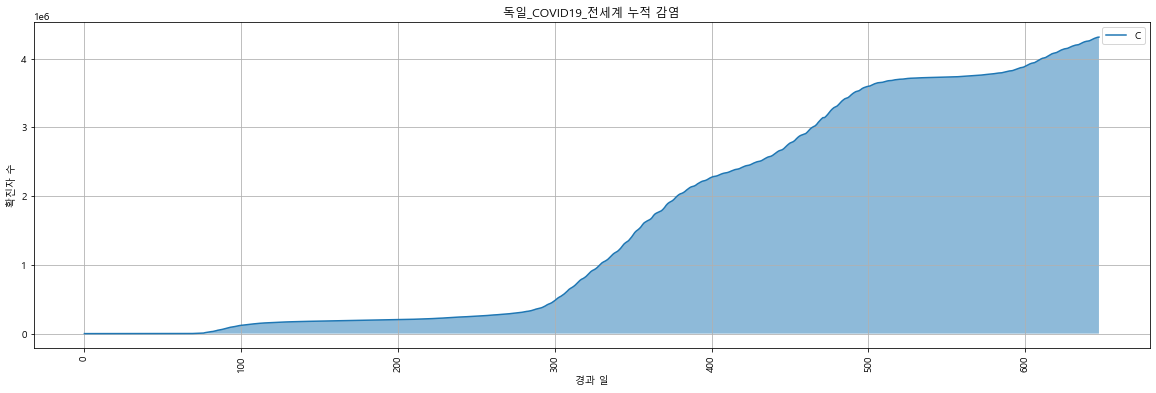

In [35]:
plt.figure(figsize= (20,6))
plt.title("독일_COVID19_전세계 누적 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(GER_COVID19["Cumulative_cases"])
plt.legend(labels="Cumulative_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(GER_COVID19.index, GER_COVID19["Cumulative_cases"].min(), GER_COVID19["Cumulative_cases"], alpha=0.5)
plt.show()

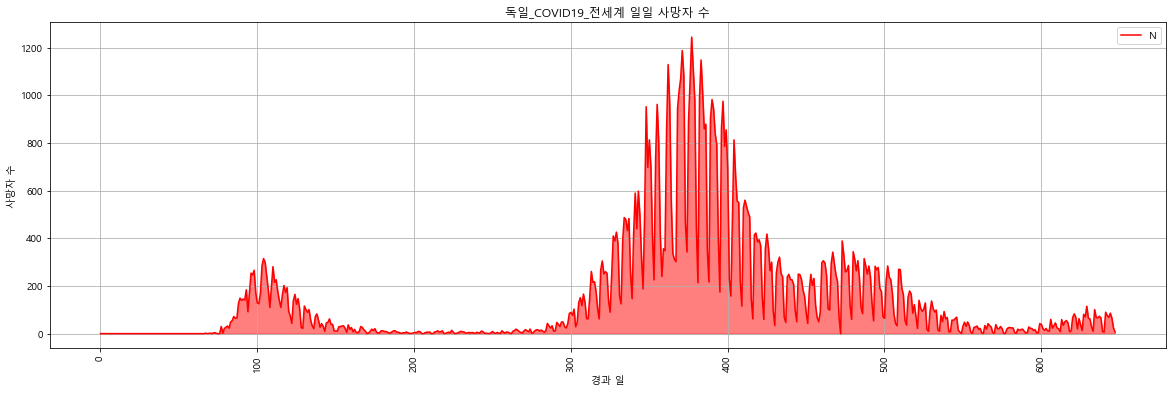

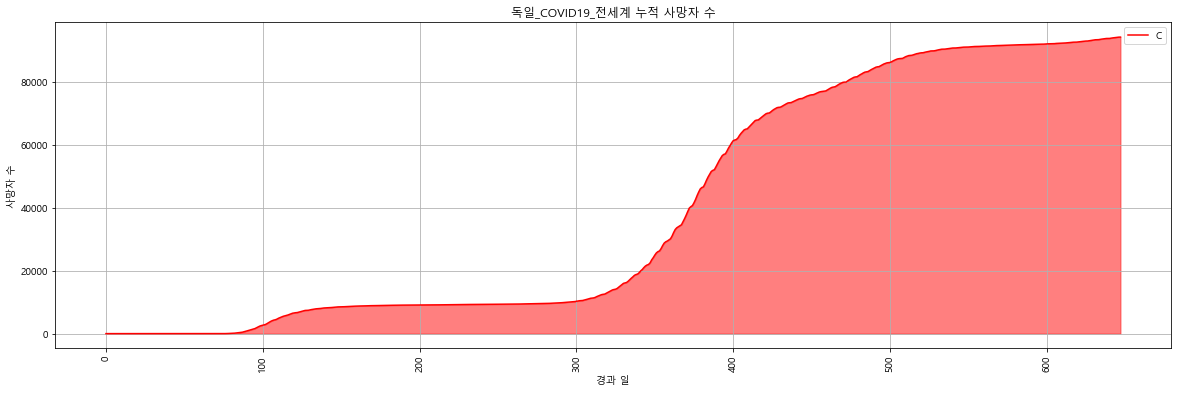

In [30]:
plt.figure(figsize= (20,6))
plt.title("독일_COVID19_전세계 일일 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(GER_COVID19["New_deaths"],color = "red")
plt.legend(labels="New_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(GER_COVID19.index, GER_COVID19["New_deaths"].min(), GER_COVID19["New_deaths"], alpha=0.5, color="red")
plt.show()


plt.figure(figsize= (20,6))
plt.title("독일_COVID19_전세계 누적 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(GER_COVID19["Cumulative_deaths"],color = "red")
plt.legend(labels="Cumulative_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(GER_COVID19.index, GER_COVID19["Cumulative_deaths"].min(), GER_COVID19["Cumulative_deaths"], alpha=0.5, color="red")
plt.show()


### 인도 일일 감염자 수와 누적 감염자 수 / 일일 사망자 수와 누적 사망자 수

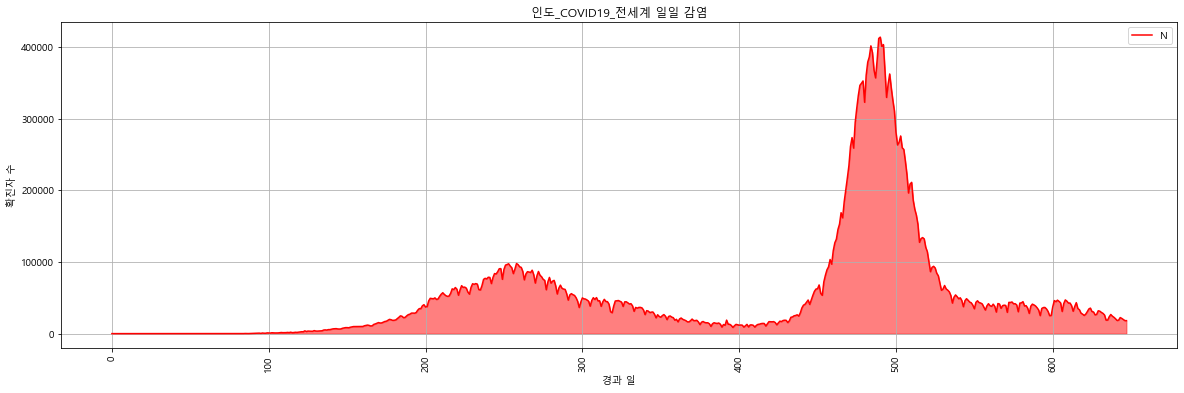

In [31]:
plt.figure(figsize= (20,6))
plt.title("인도_COVID19_전세계 일일 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(IND_COVID19["New_cases"],color = "red")
plt.legend(labels="New_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(IND_COVID19.index, IND_COVID19["New_cases"].min(), IND_COVID19["New_cases"], alpha=0.5, color="red")
plt.show()


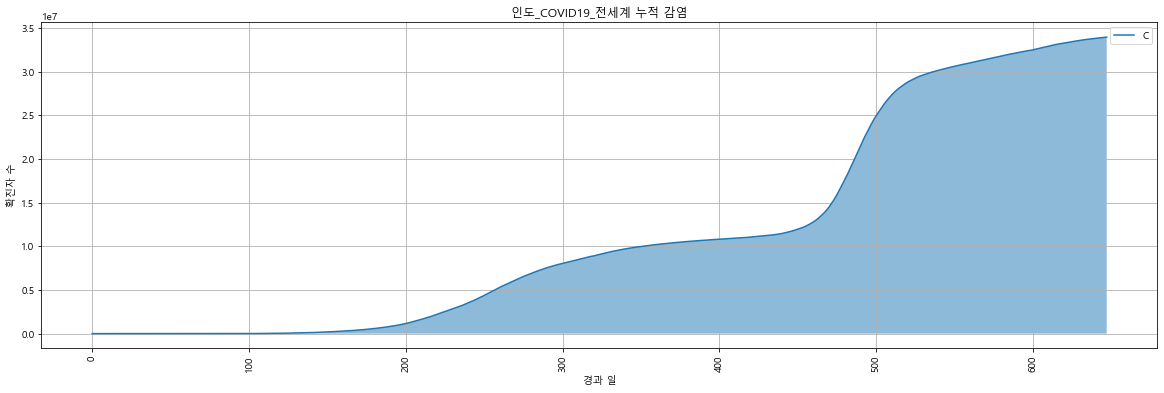

In [32]:
plt.figure(figsize= (20,6))
plt.title("인도_COVID19_전세계 누적 감염")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(IND_COVID19["Cumulative_cases"])
plt.legend(labels="Cumulative_cases", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(IND_COVID19.index, IND_COVID19["Cumulative_cases"].min(), IND_COVID19["Cumulative_cases"], alpha=0.5)
plt.show()

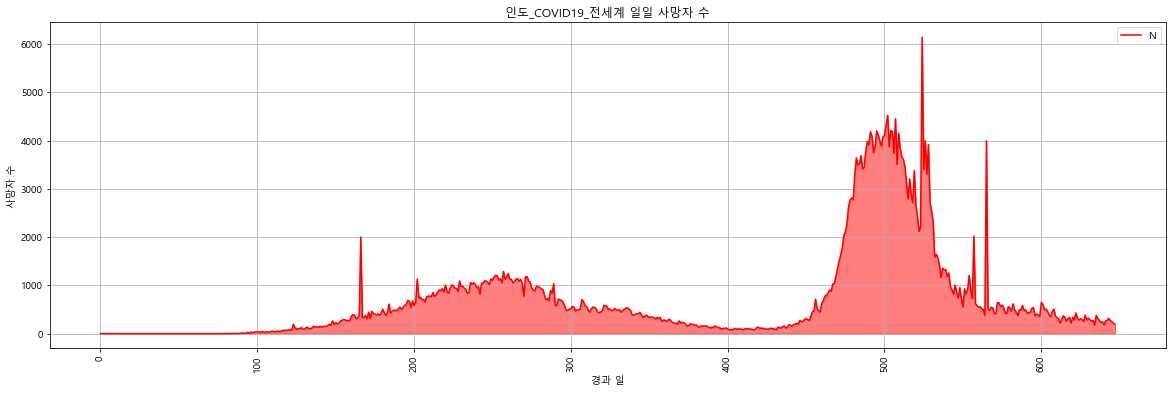

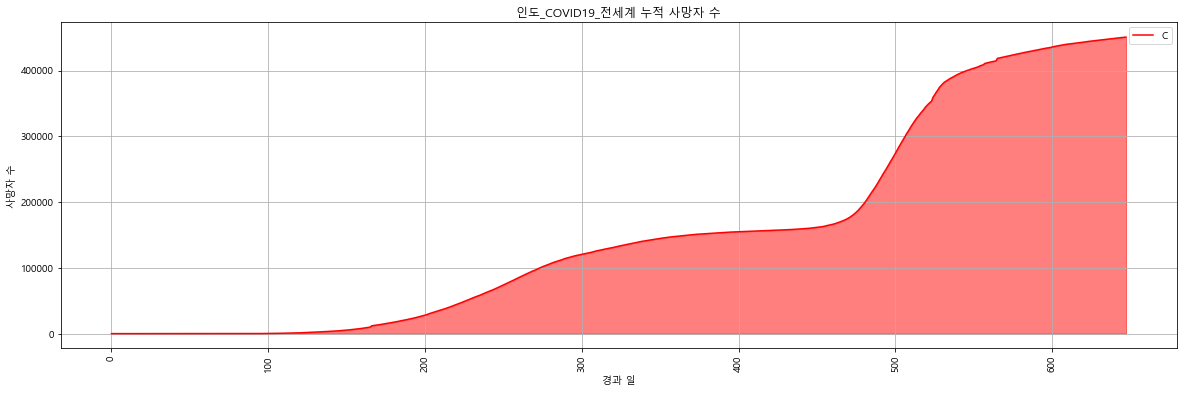

In [33]:
plt.figure(figsize= (20,6))
plt.title("인도_COVID19_전세계 일일 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(IND_COVID19["New_deaths"],color = "red")
plt.legend(labels="New_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(IND_COVID19.index, IND_COVID19["New_deaths"].min(), IND_COVID19["New_deaths"], alpha=0.5, color="red")
plt.show()


plt.figure(figsize= (20,6))
plt.title("인도_COVID19_전세계 누적 사망자 수")
plt.xlabel("경과 일")
plt.ylabel("사망자 수")
plt.plot(IND_COVID19["Cumulative_deaths"],color = "red")
plt.legend(labels="Cumulative_deaths", loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.fill_between(IND_COVID19.index, IND_COVID19["Cumulative_deaths"].min(), IND_COVID19["Cumulative_deaths"], alpha=0.5, color="red")
plt.show()


### 일일 감염자 수 비교 그래프

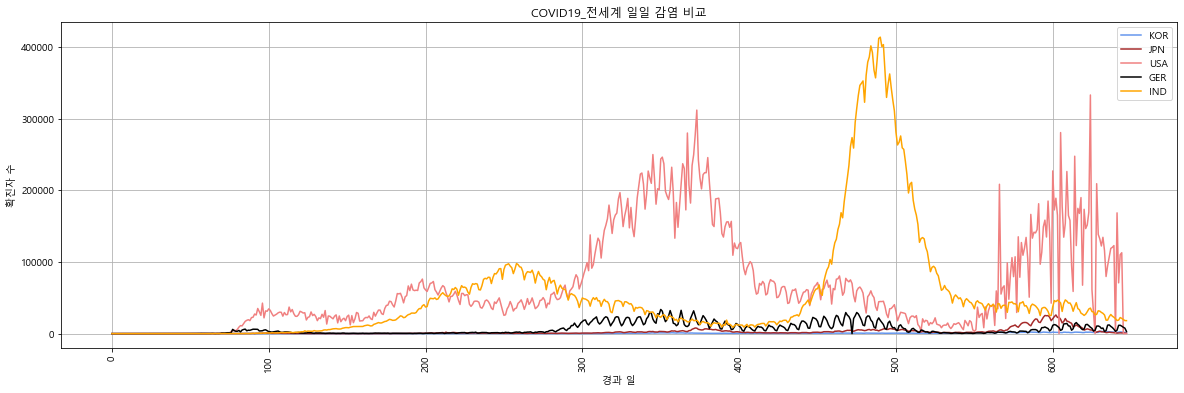

In [29]:
plt.figure(figsize= (20,6))
plt.title("COVID19_전세계 일일 감염 비교")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(KOR_COVID19["New_cases"],color = "cornflowerblue",label = "KOR")
plt.plot(JP_COVID19["New_cases"],color = "brown",label = "JPN")
plt.plot(USA_COVID19["New_cases"],color = "LightCoral",label = "USA")
plt.plot(GER_COVID19["New_cases"],color = "black", label ="GER")
plt.plot(IND_COVID19["New_cases"],color = "orange",label = "IND")
plt.legend(loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.show()


### 누적 감염자 수 비교 그래프

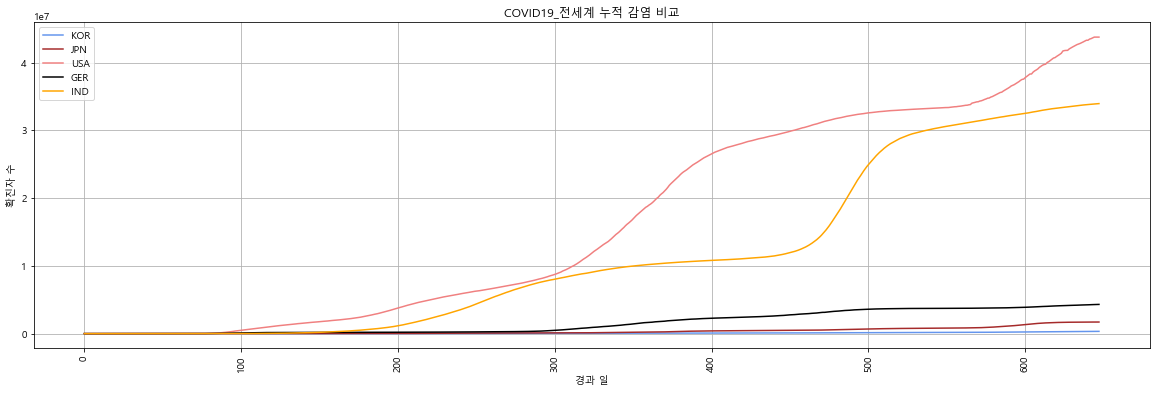

In [30]:
plt.figure(figsize= (20,6))
plt.title("COVID19_전세계 누적 감염 비교")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(KOR_COVID19["Cumulative_cases"],color = "cornflowerblue",label = "KOR")
plt.plot(JP_COVID19["Cumulative_cases"],color = "brown",label = "JPN")
plt.plot(USA_COVID19["Cumulative_cases"],color = "LightCoral",label = "USA")
plt.plot(GER_COVID19["Cumulative_cases"],color = "black", label ="GER")
plt.plot(IND_COVID19["Cumulative_cases"],color = "orange",label = "IND")
plt.legend(loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.show()


### 일일 사망자 수 비교 그래프

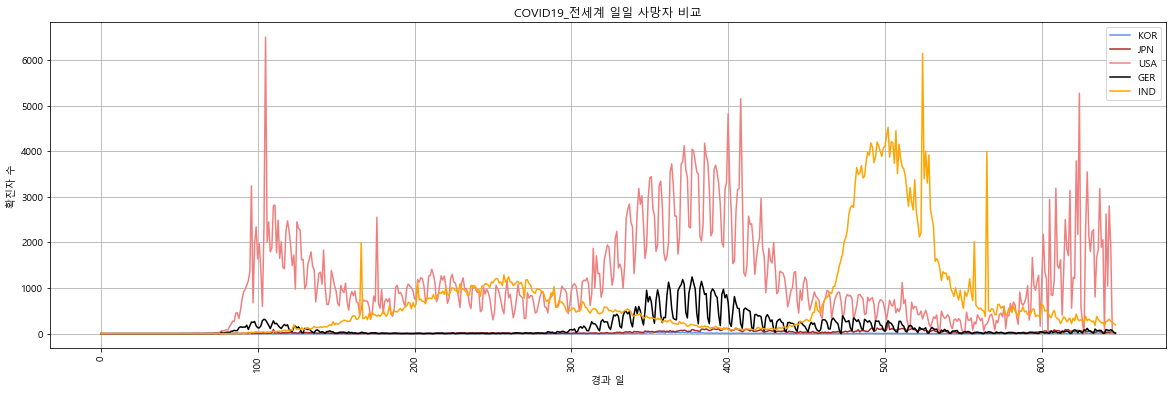

In [33]:
plt.figure(figsize= (20,6))
plt.title("COVID19_전세계 일일 사망자 비교")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(KOR_COVID19["New_deaths"],color = "cornflowerblue",label = "KOR")
plt.plot(JP_COVID19["New_deaths"],color = "brown",label = "JPN")
plt.plot(USA_COVID19["New_deaths"],color = "LightCoral",label = "USA")
plt.plot(GER_COVID19["New_deaths"],color = "black", label ="GER")
plt.plot(IND_COVID19["New_deaths"],color = "orange",label = "IND")
plt.legend(loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.show()


### 누적 사망자 수 비교 그래프

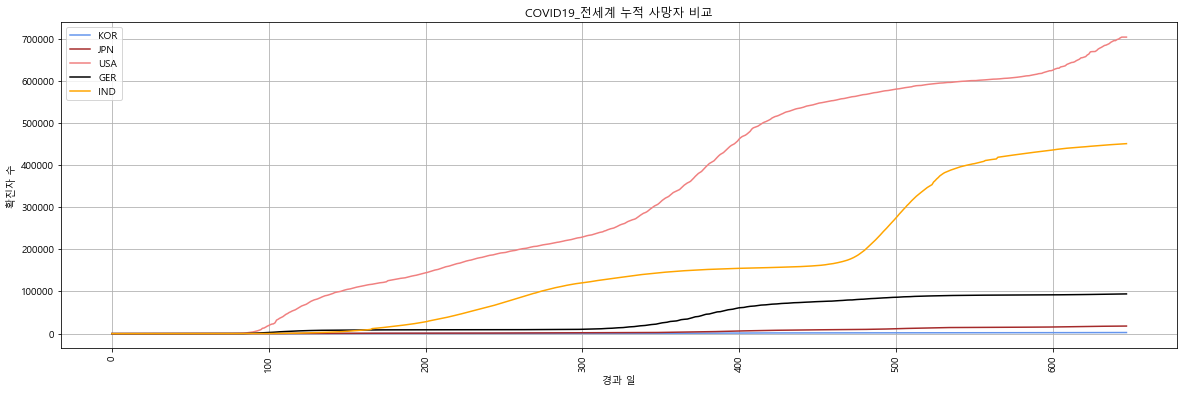

In [34]:
plt.figure(figsize= (20,6))
plt.title("COVID19_전세계 누적 사망자 비교")
plt.xlabel("경과 일")
plt.ylabel("확진자 수")
plt.plot(KOR_COVID19["Cumulative_deaths"],color = "cornflowerblue",label = "KOR")
plt.plot(JP_COVID19["Cumulative_deaths"],color = "brown",label = "JPN")
plt.plot(USA_COVID19["Cumulative_deaths"],color = "LightCoral",label = "USA")
plt.plot(GER_COVID19["Cumulative_deaths"],color = "black", label ="GER")
plt.plot(IND_COVID19["Cumulative_deaths"],color = "orange",label = "IND")
plt.legend(loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.show()


# 04. 인구수 별 비율로 다시 시각화

#### 각 나라별 인구수(출처 : 위키백과)
- 한국 : 51611400 명
- 미국 : 332915074 명
- 인도 : 1379619774 명
- 일본 : 125960000 명
- 독일 : 83783942 명


In [38]:
del merge_Covid_Data["index"]
merge_Covid_Data.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,KR,Republic of Korea,0,0,0,0
1,2020-01-04,KR,Republic of Korea,0,0,0,0
2,2020-01-05,KR,Republic of Korea,0,0,0,0
3,2020-01-06,KR,Republic of Korea,0,0,0,0
4,2020-01-07,KR,Republic of Korea,0,0,0,0


In [39]:
merge_Covid_Data.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
3235,2021-10-07,IN,India,22431,33894312,318,449856
3236,2021-10-08,IN,India,21257,33915569,271,450127
3237,2021-10-09,IN,India,19740,33935309,248,450375
3238,2021-10-10,IN,India,18166,33953475,214,450589
3239,2021-10-11,IN,India,18132,33971607,193,450782


In [40]:
pop_data = [0] * len(merge_Covid_Data)
pop_data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [41]:
country = {"Republic of Korea" : 51611400,"United States of America" : 332915074,
            "India" : 1379619774,"Japan" : 125960000,"Germany" : 83783942}
type(country)

dict

In [42]:
merge_Covid_Data[merge_Covid_Data["Country"] == "Republic of Korea"]


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,KR,Republic of Korea,0,0,0,0
1,2020-01-04,KR,Republic of Korea,0,0,0,0
2,2020-01-05,KR,Republic of Korea,0,0,0,0
3,2020-01-06,KR,Republic of Korea,0,0,0,0
4,2020-01-07,KR,Republic of Korea,0,0,0,0
...,...,...,...,...,...,...,...
643,2021-10-07,KR,Republic of Korea,2423,325800,8,2544
644,2021-10-08,KR,Republic of Korea,2176,327976,10,2554
645,2021-10-09,KR,Republic of Korea,1949,329925,6,2560
646,2021-10-10,KR,Republic of Korea,1594,331519,15,2575


In [43]:
merge_Covid_Data["population"] = 0
country = {"Republic of Korea" : 51611400, "United States of America" : 332915074, "India" : 1379619774, "Japan" : 125960000, "Germany" : 83783942}

In [44]:
country["Republic of Korea"]

51611400

### 합친 데이터에 인구수 컬럼을 추가

In [45]:
for idx, row in merge_Covid_Data.iterrows():
    if row["Country"] == "Republic of Korea":
        pop_data[idx] = 51611400
    elif row["Country"] == "United States of America":
        pop_data[idx] = 332915074
    elif row["Country"] == "Japan":
        pop_data[idx] = 125960000
    elif row["Country"] == "Germany":
        pop_data[idx] = 83783942 
    elif row["Country"] == "India":
        pop_data[idx] = 1379619774

In [46]:
merge_Covid_Data["population"] = pop_data

In [47]:
merge_Covid_Data.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,population
3235,2021-10-07,IN,India,22431,33894312,318,449856,1379619774
3236,2021-10-08,IN,India,21257,33915569,271,450127,1379619774
3237,2021-10-09,IN,India,19740,33935309,248,450375,1379619774
3238,2021-10-10,IN,India,18166,33953475,214,450589,1379619774
3239,2021-10-11,IN,India,18132,33971607,193,450782,1379619774


### 감염자수와 사망자수를 인구수로 나누어 인구수 별 비율 컬럼을 만든다

In [48]:
merge_Covid_Data["New_cases_ratio"] = merge_Covid_Data["New_cases"] / merge_Covid_Data["population"]
merge_Covid_Data["Cumulative_cases_ratio"] = merge_Covid_Data["Cumulative_cases"] / merge_Covid_Data["population"]
merge_Covid_Data["New_deaths_ratio"] = merge_Covid_Data["New_deaths"] / merge_Covid_Data["population"]
merge_Covid_Data["Cumulative_deaths_ratio"] = merge_Covid_Data["Cumulative_deaths"] / merge_Covid_Data["population"]


In [49]:
Covid_Data_rat = merge_Covid_Data[["Date_reported","Country","New_cases_ratio","Cumulative_cases_ratio","New_deaths_ratio","Cumulative_deaths_ratio"]]
Covid_Data_rat.head()

,Date_reported,Country,New_cases_ratio,Cumulative_cases_ratio,New_deaths_ratio,Cumulative_deaths_ratio
0,2020-01-03,Republic of Korea,0.0,0.0,0.0,0.0
1,2020-01-04,Republic of Korea,0.0,0.0,0.0,0.0
2,2020-01-05,Republic of Korea,0.0,0.0,0.0,0.0
3,2020-01-06,Republic of Korea,0.0,0.0,0.0,0.0
4,2020-01-07,Republic of Korea,0.0,0.0,0.0,0.0


In [50]:
Covid_Data_rat.tail()

,Date_reported,Country,New_cases_ratio,Cumulative_cases_ratio,New_deaths_ratio,Cumulative_deaths_ratio
3235,2021-10-07,India,0.000016,0.024568,2.304983e-07,0.000326
3236,2021-10-08,India,0.000015,0.024583,1.964309e-07,0.000326
3237,2021-10-09,India,0.000014,0.024598,1.797597e-07,0.000326
3238,2021-10-10,India,0.000013,0.024611,1.551152e-07,0.000327
3239,2021-10-11,India,0.000013,0.024624,1.398936e-07,0.000327


In [51]:
pop = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['New_cases_ratio'], aggfunc = 'sum')
pop = pop.reset_index()
pop.head()

Date_reported New_cases_ratio                                \
Country                       Germany India Japan Republic of Korea   
0          2020-01-03             0.0   0.0   0.0               0.0   
1          2020-01-04             0.0   0.0   0.0               0.0   
2          2020-01-05             0.0   0.0   0.0               0.0   
3          2020-01-06             0.0   0.0   0.0               0.0   
4          2020-01-07             0.0   0.0   0.0               0.0   

                                  
Country United States of America  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

In [52]:
pop.columns

MultiIndex([(  'Date_reported',                         ''),
            ('New_cases_ratio',                  'Germany'),
            ('New_cases_ratio',                    'India'),
            ('New_cases_ratio',                    'Japan'),
            ('New_cases_ratio',        'Republic of Korea'),
            ('New_cases_ratio', 'United States of America')],
           names=[None, 'Country'])

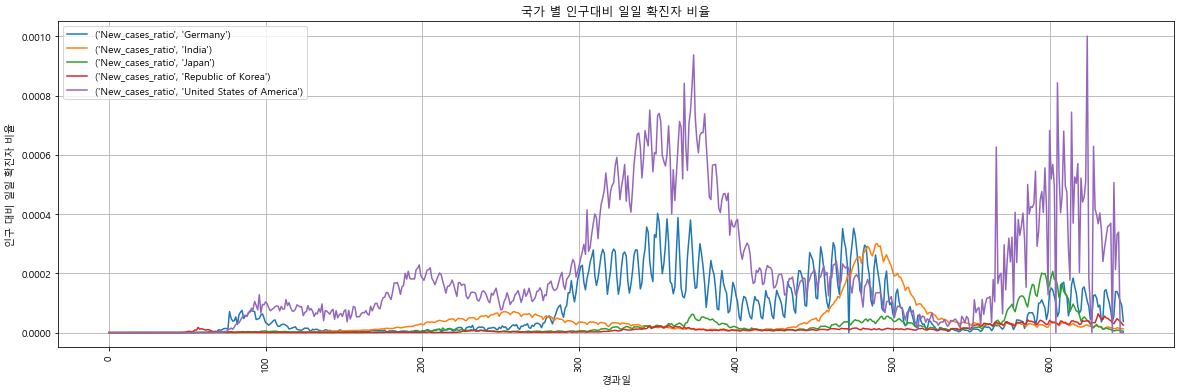

In [53]:
target_col = [('New_cases_ratio',                  'Germany'),
            ('New_cases_ratio',                    'India'),
            ('New_cases_ratio',                    'Japan'),
            ('New_cases_ratio',        'Republic of Korea'),
            ('New_cases_ratio', 'United States of America')]
plt.figure(figsize= (20,6))
plt.title("국가 별 인구대비 일일 확진자 비율")
plt.xlabel("경과일")
plt.ylabel("인구 대비 일일 확진자 비율")
plt.plot(pop[target_col])
plt.legend(labels=target_col, loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.show()

In [54]:
pop = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['Cumulative_cases_ratio'], aggfunc = 'sum')
pop = pop.reset_index()
pop.head()

Date_reported Cumulative_cases_ratio                                \
Country                              Germany India Japan Republic of Korea   
0          2020-01-03                    0.0   0.0   0.0               0.0   
1          2020-01-04                    0.0   0.0   0.0               0.0   
2          2020-01-05                    0.0   0.0   0.0               0.0   
3          2020-01-06                    0.0   0.0   0.0               0.0   
4          2020-01-07                    0.0   0.0   0.0               0.0   

                                  
Country United States of America  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

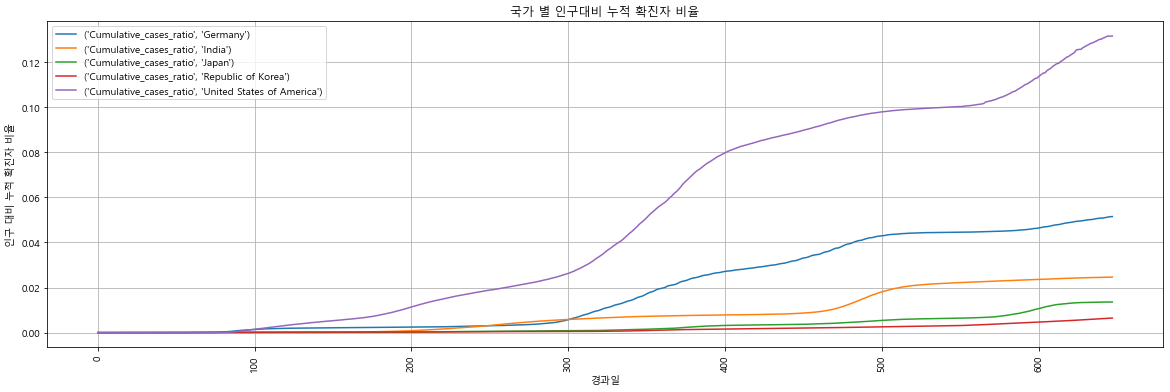

In [55]:
target_col = [('Cumulative_cases_ratio',                  'Germany'),
            ('Cumulative_cases_ratio',                    'India'),
            ('Cumulative_cases_ratio',                    'Japan'),
            ('Cumulative_cases_ratio',        'Republic of Korea'),
            ('Cumulative_cases_ratio', 'United States of America')]
plt.figure(figsize= (20,6))
plt.title("국가 별 인구대비 누적 확진자 비율")
plt.xlabel("경과일")
plt.ylabel("인구 대비 누적 확진자 비율")
plt.plot(pop[target_col])
plt.legend(labels=target_col, loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.show()

In [56]:
pop = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['New_deaths_ratio'], aggfunc = 'sum')
pop = pop.reset_index()
pop.head()

Date_reported New_deaths_ratio                                \
Country                        Germany India Japan Republic of Korea   
0          2020-01-03              0.0   0.0   0.0               0.0   
1          2020-01-04              0.0   0.0   0.0               0.0   
2          2020-01-05              0.0   0.0   0.0               0.0   
3          2020-01-06              0.0   0.0   0.0               0.0   
4          2020-01-07              0.0   0.0   0.0               0.0   

                                  
Country United States of America  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

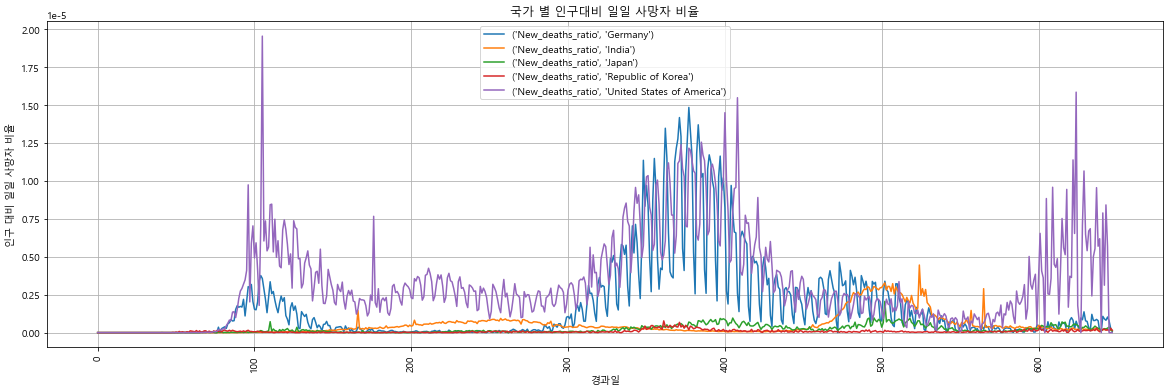

In [57]:
target_col = [('New_deaths_ratio',                  'Germany'),
            ('New_deaths_ratio',                    'India'),
            ('New_deaths_ratio',                    'Japan'),
            ('New_deaths_ratio',        'Republic of Korea'),
            ('New_deaths_ratio', 'United States of America')]
plt.figure(figsize= (20,6))
plt.title("국가 별 인구대비 일일 사망자 비율")
plt.xlabel("경과일")
plt.ylabel("인구 대비 일일 사망자 비율")
plt.plot(pop[target_col])
plt.legend(labels=target_col, loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.show()

In [58]:
pop = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['Cumulative_deaths_ratio'], aggfunc = 'sum')
pop = pop.reset_index()
pop.head()

Date_reported Cumulative_deaths_ratio                                \
Country                               Germany India Japan Republic of Korea   
0          2020-01-03                     0.0   0.0   0.0               0.0   
1          2020-01-04                     0.0   0.0   0.0               0.0   
2          2020-01-05                     0.0   0.0   0.0               0.0   
3          2020-01-06                     0.0   0.0   0.0               0.0   
4          2020-01-07                     0.0   0.0   0.0               0.0   

                                  
Country United States of America  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

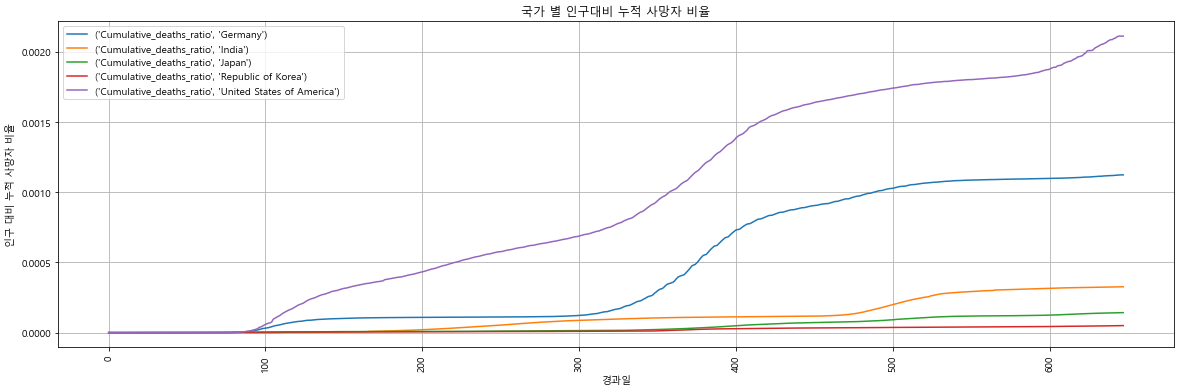

In [59]:
target_col = [('Cumulative_deaths_ratio',                  'Germany'),
            ('Cumulative_deaths_ratio',                    'India'),
            ('Cumulative_deaths_ratio',                    'Japan'),
            ('Cumulative_deaths_ratio',        'Republic of Korea'),
            ('Cumulative_deaths_ratio', 'United States of America')]
plt.figure(figsize= (20,6))
plt.title("국가 별 인구대비 누적 사망자 비율")
plt.xlabel("경과일")
plt.ylabel("인구 대비 누적 사망자 비율")
plt.plot(pop[target_col])
plt.legend(labels=target_col, loc="best")
plt.xticks(rotation = "vertical")
plt.grid(True)
plt.tick_params(bottom = "off",  labelbottom = "off")
plt.show()

# 05 . 시계열 분석

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
pop_NC = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['New_cases_ratio'], aggfunc = 'sum')
pop_NC = pop_NC.reset_index()
pop_CR = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['Cumulative_cases_ratio'], aggfunc = 'sum')
pop_CR = pop_CR.reset_index()
pop_ND = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['New_deaths_ratio'], aggfunc = 'sum')
pop_ND = pop_ND.reset_index()
pop_CD = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['Cumulative_deaths_ratio'], aggfunc = 'sum')
pop_CD = pop_CD.reset_index()

In [83]:
tmp1 = [pop_NC.columns.get_level_values(0)[n]
       +pop_NC.columns.get_level_values(1)[n] for n in range(0,len(pop_NC.columns.get_level_values(0)))]
pop_NC.columns = tmp1

tmp2 = [pop_CR.columns.get_level_values(0)[n]
       +pop_CR.columns.get_level_values(1)[n] for n in range(0,len(pop_CR.columns.get_level_values(0)))]
pop_CR.columns = tmp2

tmp3 = [pop_ND.columns.get_level_values(0)[n]
       +pop_ND.columns.get_level_values(1)[n] for n in range(0,len(pop_NC.columns.get_level_values(0)))]
pop_ND.columns = tmp3

tmp4 = [pop_CD.columns.get_level_values(0)[n]
       +pop_CD.columns.get_level_values(1)[n] for n in range(0,len(pop_CD.columns.get_level_values(0)))]
pop_CD.columns = tmp4

In [86]:
pop_NC.head()

,Date_reported,New_cases_ratioGermany,New_cases_ratioIndia,New_cases_ratioJapan,New_cases_ratioRepublic of Korea,New_cases_ratioUnited States of America
0,2020-01-03,0.0,0.0,0.0,0.0,0.0
1,2020-01-04,0.0,0.0,0.0,0.0,0.0
2,2020-01-05,0.0,0.0,0.0,0.0,0.0
3,2020-01-06,0.0,0.0,0.0,0.0,0.0
4,2020-01-07,0.0,0.0,0.0,0.0,0.0


In [90]:
GER_pop_NC = pop[["Date_reported","New_cases_ratioGermany"]]
IND_pop_NC = pop[["Date_reported","New_cases_ratioIndia"]]
JPN_pop_NC = pop[["Date_reported","New_cases_ratioJapan"]]
KOR_pop_NC = pop[["Date_reported","New_cases_ratioRepublic of Korea"]]
USA_pop_NC = pop[["Date_reported","New_cases_ratioUnited States of America"]]


In [92]:
df_G = pd.DataFrame({"ds" : GER_pop_NC["Date_reported"], "y" : GER_pop_NC["New_cases_ratioGermany"]})
df_I = pd.DataFrame({"ds" : IND_pop_NC["Date_reported"], "y" : IND_pop_NC["New_cases_ratioIndia"]})
df_J = pd.DataFrame({"ds" : JPN_pop_NC["Date_reported"], "y" : JPN_pop_NC["New_cases_ratioJapan"]})
df_K = pd.DataFrame({"ds" : KOR_pop_NC["Date_reported"], "y" : KOR_pop_NC["New_cases_ratioRepublic of Korea"]})
df_U = pd.DataFrame({"ds" : USA_pop_NC["Date_reported"], "y" : USA_pop_NC["New_cases_ratioUnited States of America"]})

In [71]:
df_G.head()

,ds,y
0,2020-01-03,0.0
1,2020-01-04,0.0
2,2020-01-05,0.0
3,2020-01-06,0.0
4,2020-01-07,0.0


In [94]:
df_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      648 non-null    object 
 1   y       648 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [95]:
df_G["ds"] = pd.to_datetime(df_G["ds"],infer_datetime_format=True)
df_I["ds"] = pd.to_datetime(df_I["ds"],infer_datetime_format=True)
df_J["ds"] = pd.to_datetime(df_J["ds"],infer_datetime_format=True)
df_K["ds"] = pd.to_datetime(df_K["ds"],infer_datetime_format=True)
df_U["ds"] = pd.to_datetime(df_U["ds"],infer_datetime_format=True)

df_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      648 non-null    datetime64[ns]
 1   y       648 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.2 KB


<AxesSubplot:>

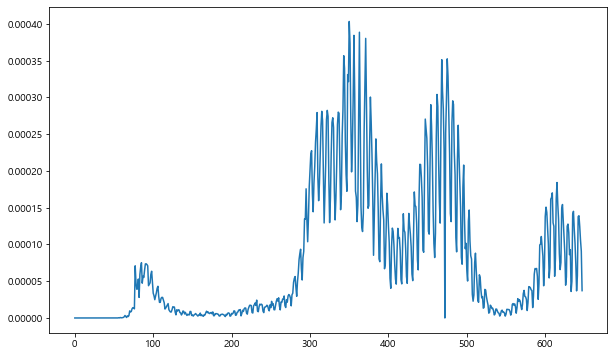

In [96]:
df_G["y"].plot(figsize = (10,6))

- m1 : 독일
- m2 : 인도
- m3 : 일본
- m4 : 한국
- m5 : 미국

In [98]:
from fbprophet import Prophet

m1 = Prophet(yearly_seasonality=True, daily_seasonality=True)
m1.fit(df_G)

m2 = Prophet(yearly_seasonality=True, daily_seasonality=True)
m2.fit(df_I)

m3 = Prophet(yearly_seasonality=True, daily_seasonality=True)
m3.fit(df_J)

m4 = Prophet(yearly_seasonality=True, daily_seasonality=True)
m4.fit(df_K)

m5 = Prophet(yearly_seasonality=True, daily_seasonality=True)
m5.fit(df_U)

In [99]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1[["ds","yhat","yhat_lower","yhat_upper"]].tail()

future2 = m2.make_future_dataframe(periods=60)
forecast2 = m2.predict(future2)
forecast2[["ds","yhat","yhat_lower","yhat_upper"]].tail()

future3 = m3.make_future_dataframe(periods=60)
forecast3 = m3.predict(future)
forecast3[["ds","yhat","yhat_lower","yhat_upper"]].tail()

future4 = m4.make_future_dataframe(periods=60)
forecast4 = m4.predict(future)
forecast4[["ds","yhat","yhat_lower","yhat_upper"]].tail()

future5 = m5.make_future_dataframe(periods=60)
forecast5 = m5.predict(future)
forecast5[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
703,2021-12-06,0.000987,0.000874,0.001095
704,2021-12-07,0.000975,0.000871,0.001085
705,2021-12-08,0.000998,0.000890,0.001106
706,2021-12-09,0.001024,0.000910,0.001127
707,2021-12-10,0.001042,0.000943,0.001154


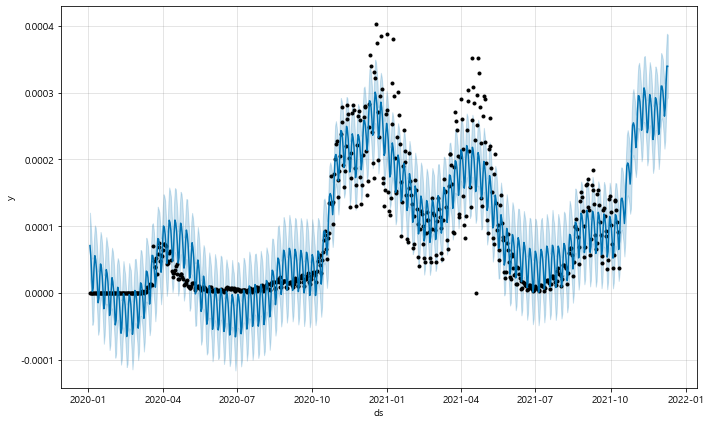

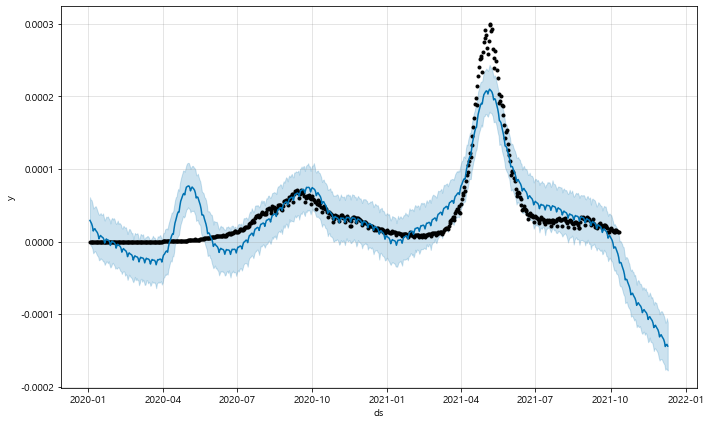

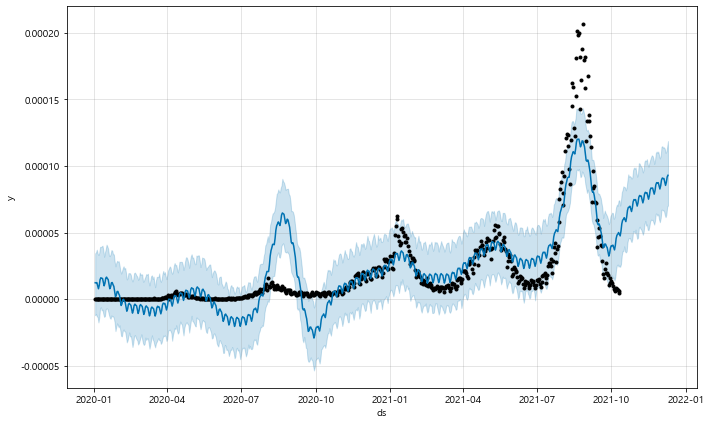

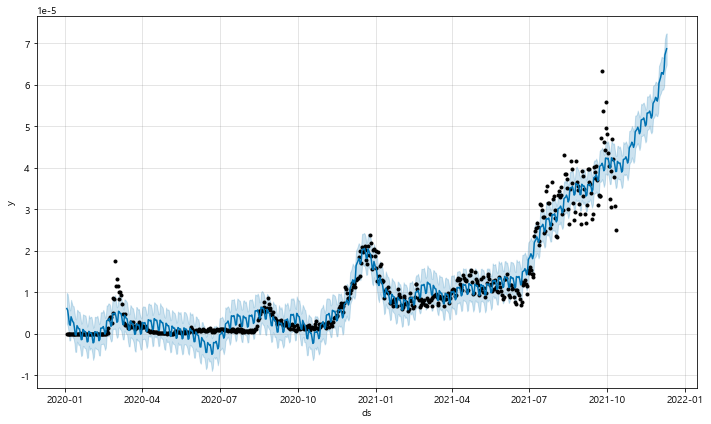

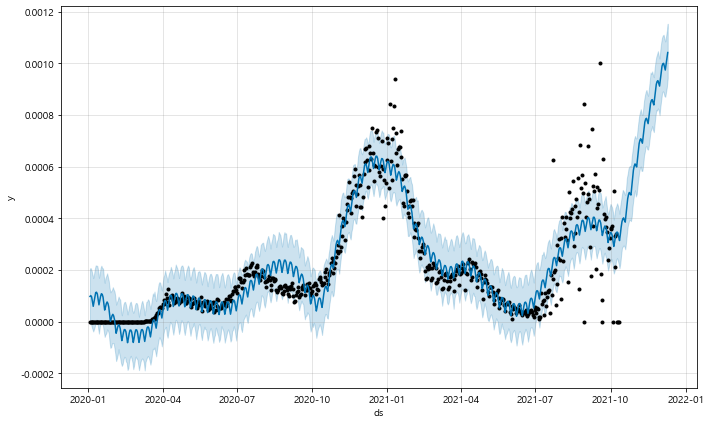

In [100]:
m1.plot(forecast1);
m2.plot(forecast2);
m3.plot(forecast3);
m4.plot(forecast4);
m5.plot(forecast5);

#### 시계열의 추세 데이터가 완벽하게 맞아 떨어지지 않지만 시계열 그래프 토대로 분석을 하자면
#### 일일 확진자 수의 그래프 시계열 추후 방향성을 보면 인도는 오히려 감소 추세를 보이고 있고
#### 나머지 국가들은 증가추세를 보이고 있습니다. 그러나 그중에서 미국과 한국이 가파르게 올라가는 추세를 보이고 있다.
#### 반면 일본은 완만하게 증가폭이 줄어 들고 있다.
#### 이 그래프에 대한 결과 해석은 06번에서 확인 할 수 있다.

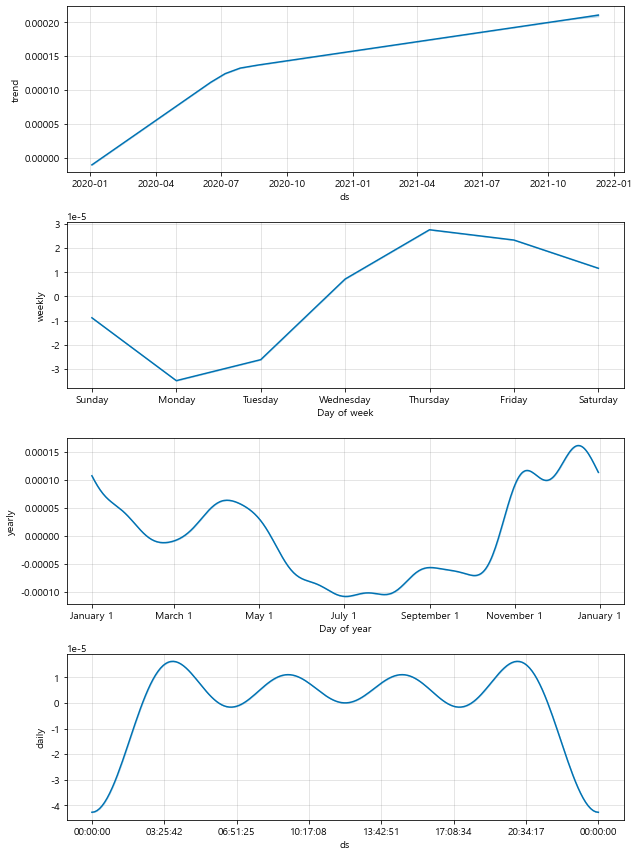

In [108]:
# 독일
m1.plot_components(forecast1);

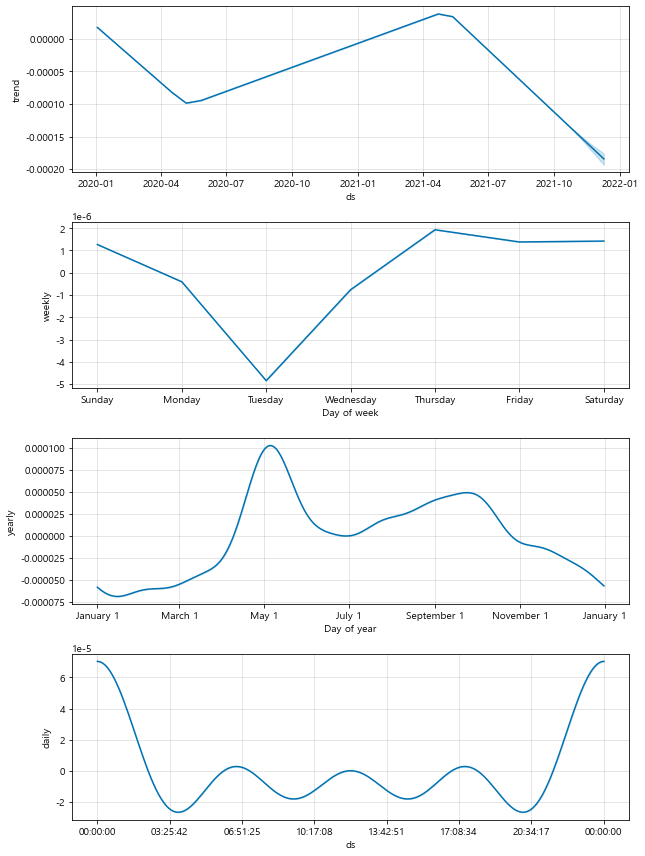

In [109]:
# 인도
m2.plot_components(forecast2);

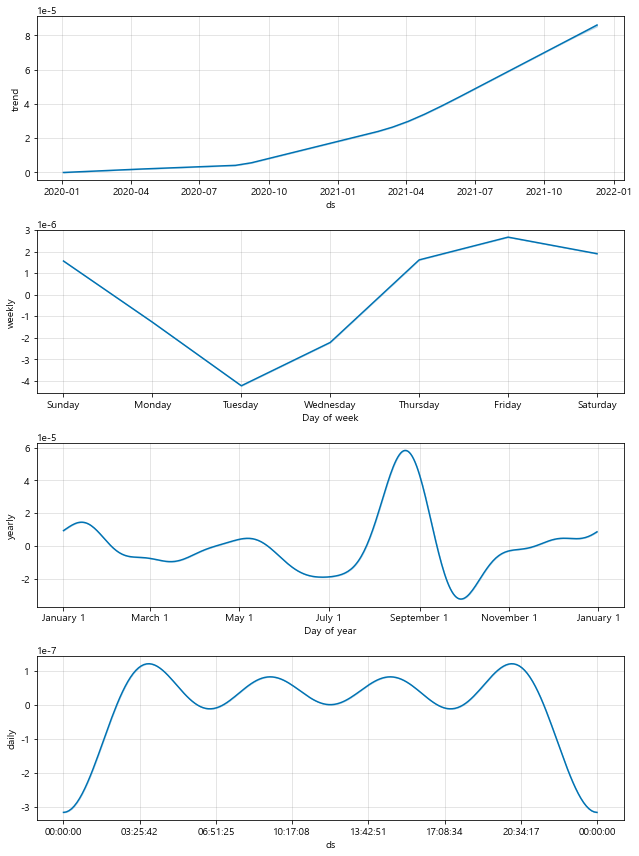

In [110]:
# 일본
m3.plot_components(forecast3);

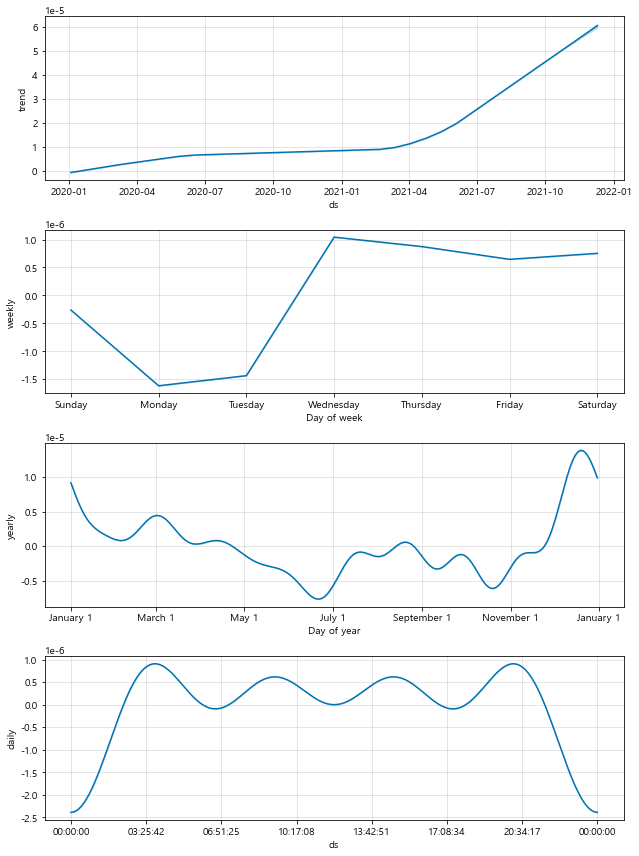

In [111]:
# 한국
m4.plot_components(forecast4);

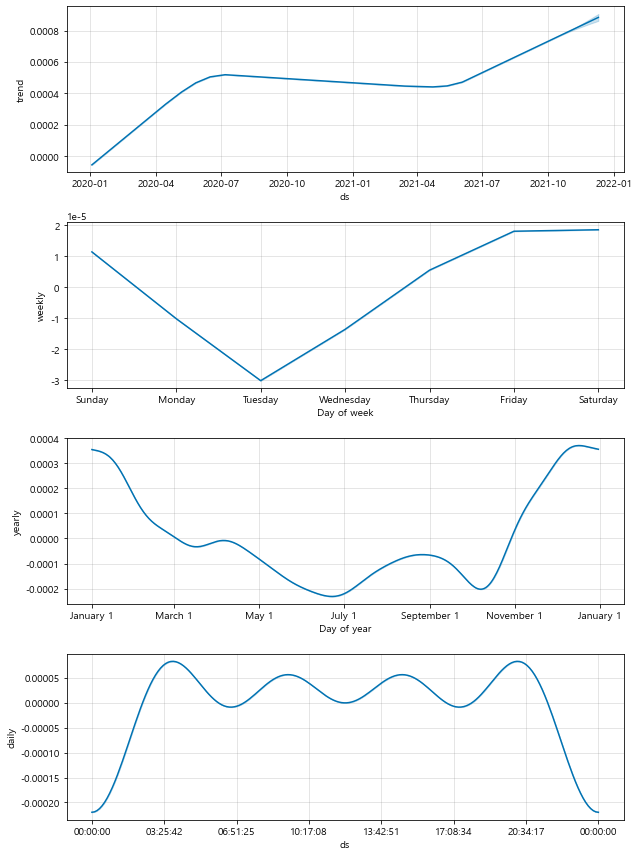

In [112]:
# 미국
m5.plot_components(forecast5);

In [ ]:
m1.plot_components(forecast1);
m2.plot_components(forecast2);
m3.plot_components(forecast3);
m4.plot_components(forecast4);
m5.plot_components(forecast5);

# 06 . 우리나라의 방역 상태는?

- 방역상태 확인 근거
    - 백신 접종률 비교
    - 시계열 데이터를 근거로 추후 방향성
    - 누적 감염자수 대비 누적 사망자 수

## 백신 접종률 비교

In [126]:
# WHO에서 제공하는 COVID-19 백신 데이터를 활용
Vaccine_raw_data = pd.read_csv("../data/vaccination-data.csv")
Vaccine_raw_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Falkland Islands (Malvinas),FLK,AMRO,OWID,2021-04-14,4407,2632.0,126.529,75.567,1775.0,50.962,AstraZeneca - AZD1222,NaN,1.0
1,Saint Helena,SHN,AFRO,OWID,2021-05-05,7892,4361.0,129.995,71.833,3531.0,58.162,AstraZeneca - AZD1222,NaN,1.0
2,Greenland,GRL,EURO,OWID,2021-10-08,76319,39936.0,134.431,70.345,36383.0,64.086,Moderna - mRNA-1273,NaN,1.0
3,Faroe Islands,FRO,EURO,OWID,2021-10-08,75360,38647.0,154.221,79.089,36713.0,75.131,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaN,2.0
4,Liechtenstein,LIE,OTHER,OWID,2021-10-07,46928,24604.0,121.114,63.499,22995.0,59.347,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaN,2.0


In [131]:
condition = (Vaccine_raw_data.COUNTRY == "Republic of Korea") |(Vaccine_raw_data.COUNTRY == "United States of America")| (Vaccine_raw_data.COUNTRY == "Japan")|(Vaccine_raw_data.COUNTRY == "Germany")|(Vaccine_raw_data.COUNTRY == "India")
Vaccine_data = Vaccine_raw_data.loc[condition, ['COUNTRY', 'DATE_UPDATED', 'PERSONS_FULLY_VACCINATED_PER100',"NUMBER_VACCINES_TYPES_USED","FIRST_VACCINE_DATE"]] # 필터링 된 row의 특정 컬럼만 추출
Vaccine_data = Vaccine_data.reset_index()
del Vaccine_data["index"]
Vaccine_data

,COUNTRY,DATE_UPDATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,FIRST_VACCINE_DATE
0,Republic of Korea,2021-10-04,52.630,5.0,2021-02-26
1,India,2021-10-05,18.236,5.0,2021-01-16
2,Japan,2021-09-30,59.856,4.0,2021-02-17
3,United States of America,2021-10-08,56.460,3.0,2020-12-14
4,Germany,2021-10-03,64.658,4.0,2020-12-23


#### 백신 접종률 데이터를 보았을 때 5개 국가 중 인구수가 가장 적은 나라가 대한민국인데 접종률은 4번째이다.
#### 인도를 뺀 나머지 3개국가 보다 낮은 것을 알 수 있다.
#### 그리고 백신 접종 시작 날짜 또한 제일 늦어 다른 선진국에 비해 코로나 대비 상태가 좋다고는 볼 수 없다.

## 시계열 데이터 비교

- m1 : 독일
- m2 : 인도
- m3 : 일본
- m4 : 한국
- m5 : 미국

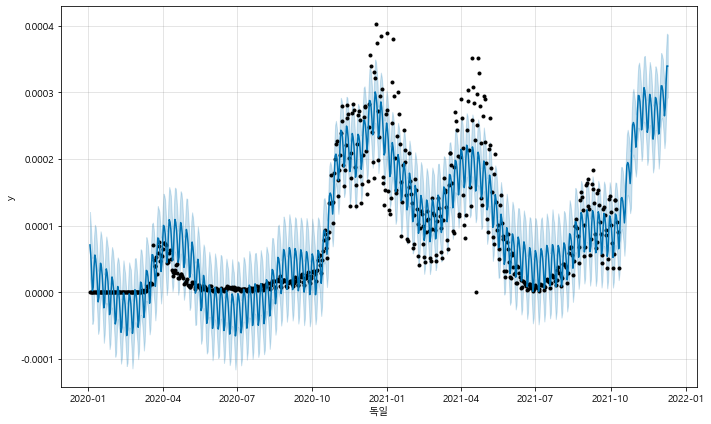

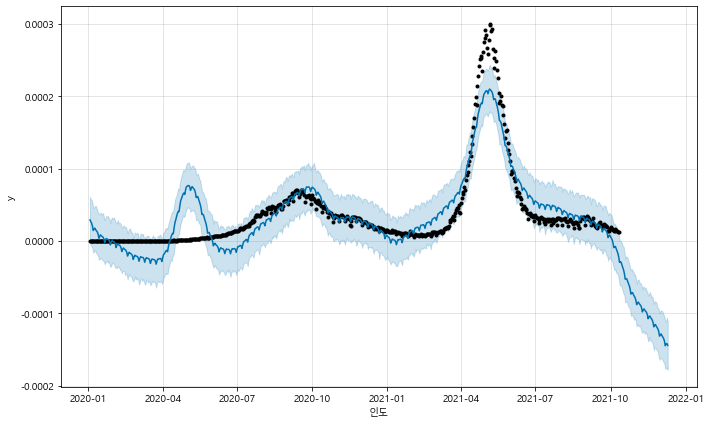

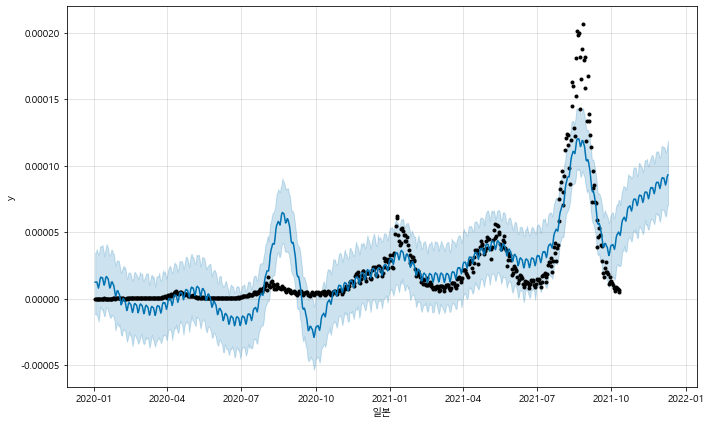

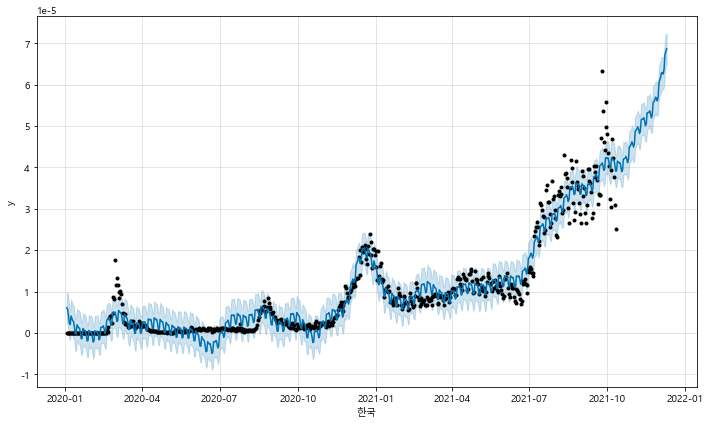

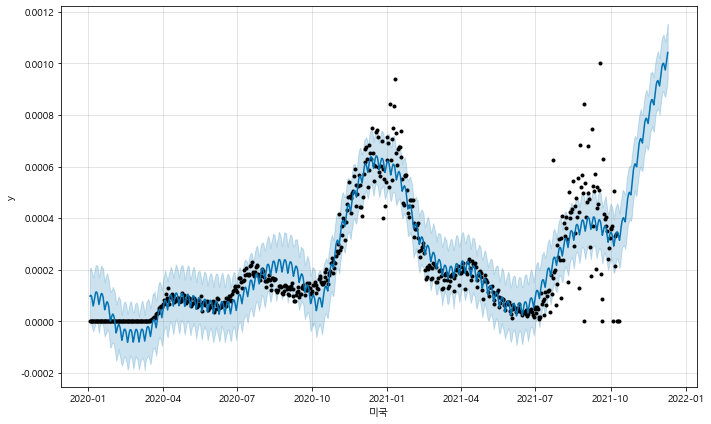

In [135]:
m1.plot(forecast1,xlabel='독일');
m2.plot(forecast2,xlabel='인도');
m3.plot(forecast3,xlabel='일본');
m4.plot(forecast4,xlabel='한국');
m5.plot(forecast5,xlabel='미국');

#### 시계열의 추세 데이터가 완벽하게 맞아 떨어지지 않지만 시계열 그래프 토대로 분석을 하자면
#### 일일 확진자 수의 그래프 시계열 추후 방향성을 보면 인도는 오히려 감소 추세를 보이고 있고
#### 나머지 국가들은 증가추세를 보이고 있습니다. 그러나 그중에서 미국과 한국이 가파르게 올라가는 추세를 보이고 있다.
#### 반면 일본은 완만하게 증가폭이 줄어 들고 있다.
#### 이를 통해 확인한 결과는 현재 다른 국가에 비해 대한민국은 코로나로 부터 여전히 위험하고 조심하고 주의해야할 상황이라는것을 알 수 있다.


## 누적 확진자 수 대비 사망자 수

In [142]:
pop = pd.pivot_table(Covid_Data_rat, index = ['Date_reported'],columns= ["Country"], values = ['Cumulative_cases_ratio',"Cumulative_deaths_ratio"], aggfunc = 'sum')
pop = pop.reset_index()
pop.iloc[-1:]

Date_reported Cumulative_cases_ratio                      \
Country                              Germany     India     Japan   
647        2021-10-11               0.051482  0.024624  0.013583   

                                                   Cumulative_deaths_ratio  \
Country Republic of Korea United States of America                 Germany   
647              0.006448                 0.131542                0.001124   

                                                                        
Country     India     Japan Republic of Korea United States of America  
647      0.000327  0.000142           0.00005                 0.002113

In [143]:
tmp5 = [pop.columns.get_level_values(0)[n]
       +pop.columns.get_level_values(1)[n] for n in range(0,len(pop.columns.get_level_values(0)))]
pop.columns = tmp5

In [146]:
case_death = pop.iloc[-1:]
case_death

,Date_reported,Cumulative_cases_ratioGermany,Cumulative_cases_ratioIndia,Cumulative_cases_ratioJapan,Cumulative_cases_ratioRepublic of Korea,Cumulative_cases_ratioUnited States of America,Cumulative_deaths_ratioGermany,Cumulative_deaths_ratioIndia,Cumulative_deaths_ratioJapan,Cumulative_deaths_ratioRepublic of Korea,Cumulative_deaths_ratioUnited States of America
647,2021-10-11,0.051482,0.024624,0.013583,0.006448,0.131542,0.001124,0.000327,0.000142,0.00005,0.002113


In [150]:
case_death["KOR_death"] = case_death["Cumulative_deaths_ratioRepublic of Korea"] / case_death["Cumulative_cases_ratioRepublic of Korea"] * 100
case_death["USA_death"] = case_death["Cumulative_deaths_ratioUnited States of America"] / case_death["Cumulative_cases_ratioUnited States of America"] * 100
case_death["JPN_death"] = case_death["Cumulative_deaths_ratioJapan"] / case_death["Cumulative_cases_ratioJapan"] * 100
case_death["GER_death"] = case_death["Cumulative_deaths_ratioGermany"] / case_death["Cumulative_cases_ratioGermany"] * 100
case_death["IND_death"] = case_death["Cumulative_deaths_ratioIndia"] / case_death["Cumulative_cases_ratioIndia"] * 100

C:\Users\alal8\AppData\Local\Temp/ipykernel_21632/71591875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case_death["KOR_death"] = case_death["Cumulative_deaths_ratioRepublic of Korea"] / case_death["Cumulative_cases_ratioRepublic of Korea"] * 100
C:\Users\alal8\AppData\Local\Temp/ipykernel_21632/71591875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case_death["USA_death"] = case_death["Cumulative_deaths_ratioUnited States of America"] / case_death["Cumulative_cases_ratioUnited States of Americ

In [172]:
case_To_death = case_death[["KOR_death","USA_death","JPN_death","GER_death","IND_death"]]
case_To_death

,KOR_death,USA_death,JPN_death,GER_death,IND_death
647,0.776105,1.606675,1.048585,2.184109,1.326938


#### 감염자 수 대비 사망자 수를 확인해보면 독일이 가장 높고 한국이 제일 낮은 것을 볼 수 있습니다.
#### 이 뜻은 다른 국가들에 비해 대한민국이 코로나에 걸리더라도 치료 체계가 잘 구비되어있어
#### 코로나에 걸리더라도 사망에 까지 이르는 비율이 낮다는 것을 보여준다.

# 07. 의료수준 가늠해보자

국가의 의료수준을 가늠하기 위한 척도로 국가의 병상수가 얼마나 잘 구비되어 있는지
국민들이 병원 접근성이 얼마나 좋은지를 확인하기 위한 의사 진료 횟수를 확인하여
국가의 의료수준을 가늠 해보려고 한다.

### 컬럼 설명 
- seat_per1000p : 인구 1000명당 병상 수
- seat_per1000p_mean : OECD 평균 인구 1000명당 병상 수
- per_meet_DC : 인구 1명 당 의사 진료 횟수 (인도에 대한 데이터는 찾을 수 없어 0으로 기록)
- per_meet_DC_mean : OECD 평균 인구 1명 당 의사 진료 횟수

In [154]:
hosipital = pd.read_csv("../data/hospital_data.csv")
hosipital

,COUNTRY,seat_per1000p,seat_per1000p_mean,per_meet_DC,per_meet_DC_mean
0,Republic of Korea,10.3,4.7,14.3,7.1
1,India,0.9,4.7,0.0,7.1
2,Japan,13.4,4.7,12.6,7.1
3,United States of America,2.8,4.7,4.5,7.1
4,Germany,8.0,4.7,9.9,7.1


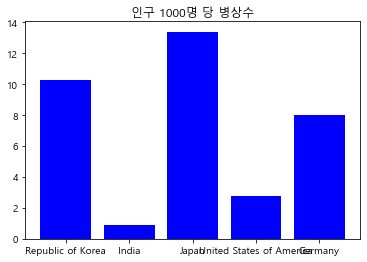

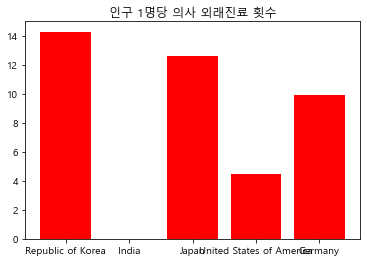

In [176]:
plt.bar(hosipital["COUNTRY"], hosipital["seat_per1000p"],color='b')
plt.title("인구 1000명 당 병상수")
plt.show()

plt.bar(hosipital["COUNTRY"], hosipital["per_meet_DC"],color='r')
plt.title("인구 1명당 의사 외래진료 횟수")
plt.show()

그래프를 봤을때 기준으로 잡은 의료수준 척도에서는 한국이 의료수준이 높다고 볼 수 있다.

In [179]:
hosipital["cal"] = (hosipital["seat_per1000p"] + hosipital["per_meet_DC"])/2
hosipital["cal"]

0    12.30
1     0.45
2    13.00
3     3.65
4     8.95
Name: cal, dtype: float64

In [181]:
Vaccine_data["cal_hospital"] = hosipital["cal"]
Vaccine_data

,COUNTRY,DATE_UPDATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,FIRST_VACCINE_DATE,cal_hospital
0,Republic of Korea,2021-10-04,52.630,5.0,2021-02-26,12.30
1,India,2021-10-05,18.236,5.0,2021-01-16,0.45
2,Japan,2021-09-30,59.856,4.0,2021-02-17,13.00
3,United States of America,2021-10-08,56.460,3.0,2020-12-14,3.65
4,Germany,2021-10-03,64.658,4.0,2020-12-23,8.95


In [192]:
death_per = [0.776105,1.326938,1.048585,1.606675,2.184109]

In [193]:
Vaccine_data["death_per"] =death_per

In [195]:
merge_covid19_data = Vaccine_data.copy()
merge_covid19_data

,COUNTRY,DATE_UPDATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,FIRST_VACCINE_DATE,cal_hospital,death_per
0,Republic of Korea,2021-10-04,52.630,5.0,2021-02-26,12.30,0.776105
1,India,2021-10-05,18.236,5.0,2021-01-16,0.45,1.326938
2,Japan,2021-09-30,59.856,4.0,2021-02-17,13.00,1.048585
3,United States of America,2021-10-08,56.460,3.0,2020-12-14,3.65,1.606675
4,Germany,2021-10-03,64.658,4.0,2020-12-23,8.95,2.184109


### 인구대비 한국의 백신 접종률은 상위권은 아니지만 의료수준 면에서나 감염자별 사망자수에서 적은 수치를 나타내고 있다.
### 원래 한국의 의료수준이 높아 백신의 접종이 늦더라도 코로나에 대한 대비를 금방 할 수 있었으며
### 코로나에 대한 치료가 빠르게 진행 될 수 있었다고 볼 수 있다.